In [1]:
!pip install catboost
!pip install lightgbm
!pip install xgboost
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from scipy.special import factorial
from scipy.stats import skew
import seaborn as sns

In [2]:
model = pd.read_excel('sciencehack-for-advanced_data/For_model_labled.xlsx')
check = pd.read_excel('sciencehack-for-advanced_data/For_check_unlabled.xlsx')

In [3]:
model

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84994,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,24.62280,-12.73870,11.36170,17.746000,17.06930,0.909127,2.413270,NaN,1
84995,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,2.62073,1.16556,-1.31086,1.947150,1.75410,0.957094,-0.844003,NaN,-1
84996,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,19.28590,1.83493,12.76360,14.341100,12.89480,0.958503,1.428010,NaN,1
84997,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,16.78890,-3.52827,10.45790,12.651100,11.03700,0.981098,1.896180,NaN,1


In [4]:
model.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
count,84999.000000,8.499900e+04,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84999.000000,84915.000000,84999.000000
mean,147943.253485,4.962821e+08,37.045381,0.142232,0.213977,-4.112201,14.874176,-0.148404,0.022726,-0.001753,38.982997,-0.025255,0.161898,-14.394625,13.681966,-0.486584,0.024645,29.468604,-0.004294
std,918.668399,4.033153e+08,41.236292,13.739362,13.776195,51.742461,12.544879,1.442175,1.799307,1.000004,42.933303,13.219606,13.190135,52.981032,12.710818,1.552318,1.818871,25.193575,0.999997
min,146511.000000,6.414000e+03,0.518048,-250.587000,-126.079000,-840.987000,0.250803,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-134.753000,-655.396000,0.026651,-7.064790,-3.141580,2.000080,-1.000000
25%,147114.000000,2.037406e+08,8.940580,-5.641050,-5.631125,-18.375500,3.987000,-1.350160,-1.525920,-1.000000,9.657655,-4.592310,-4.356580,-29.597650,3.588000,-2.004245,-1.555930,12.090150,-1.000000
50%,147929.000000,3.914622e+08,22.435200,0.151615,0.110562,-0.966802,13.335300,-0.168560,0.036936,-1.000000,22.224300,-0.056887,0.110538,-5.141710,10.790900,-0.735136,0.039115,20.725100,-1.000000
75%,149011.000000,6.333584e+08,50.971750,6.159715,6.121985,11.554150,20.426900,1.038005,1.562370,1.000000,56.982800,4.615085,4.887635,8.074785,19.508300,0.964328,1.607245,37.746100,1.000000
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,513.709000,265.578000,2.622970,3.202600,1.000000,667.450000,227.330000,166.283000,623.049000,281.654000,2.609400,3.202700,109.999000,1.000000


In [5]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84999 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84999 non-null  int64  
 1   Event   84999 non-null  int64  
 2   E1      84999 non-null  float64
 3   px1     84999 non-null  float64
 4   py1     84999 non-null  float64
 5   pz1     84999 non-null  float64
 6   pt1     84999 non-null  float64
 7   eta1    84999 non-null  float64
 8   phi1    84999 non-null  float64
 9   Q1      84999 non-null  int64  
 10  E2      84999 non-null  float64
 11  px2     84999 non-null  float64
 12  py2     84999 non-null  float64
 13  pz2     84999 non-null  float64
 14  pt2     84999 non-null  float64
 15  eta2    84999 non-null  float64
 16  phi2    84999 non-null  float64
 17  M       84915 non-null  float64
 18  Q2      84999 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 12.3 MB


In [6]:
model.isna().sum().sum()

84

In [7]:
model = model.fillna(2.272640)

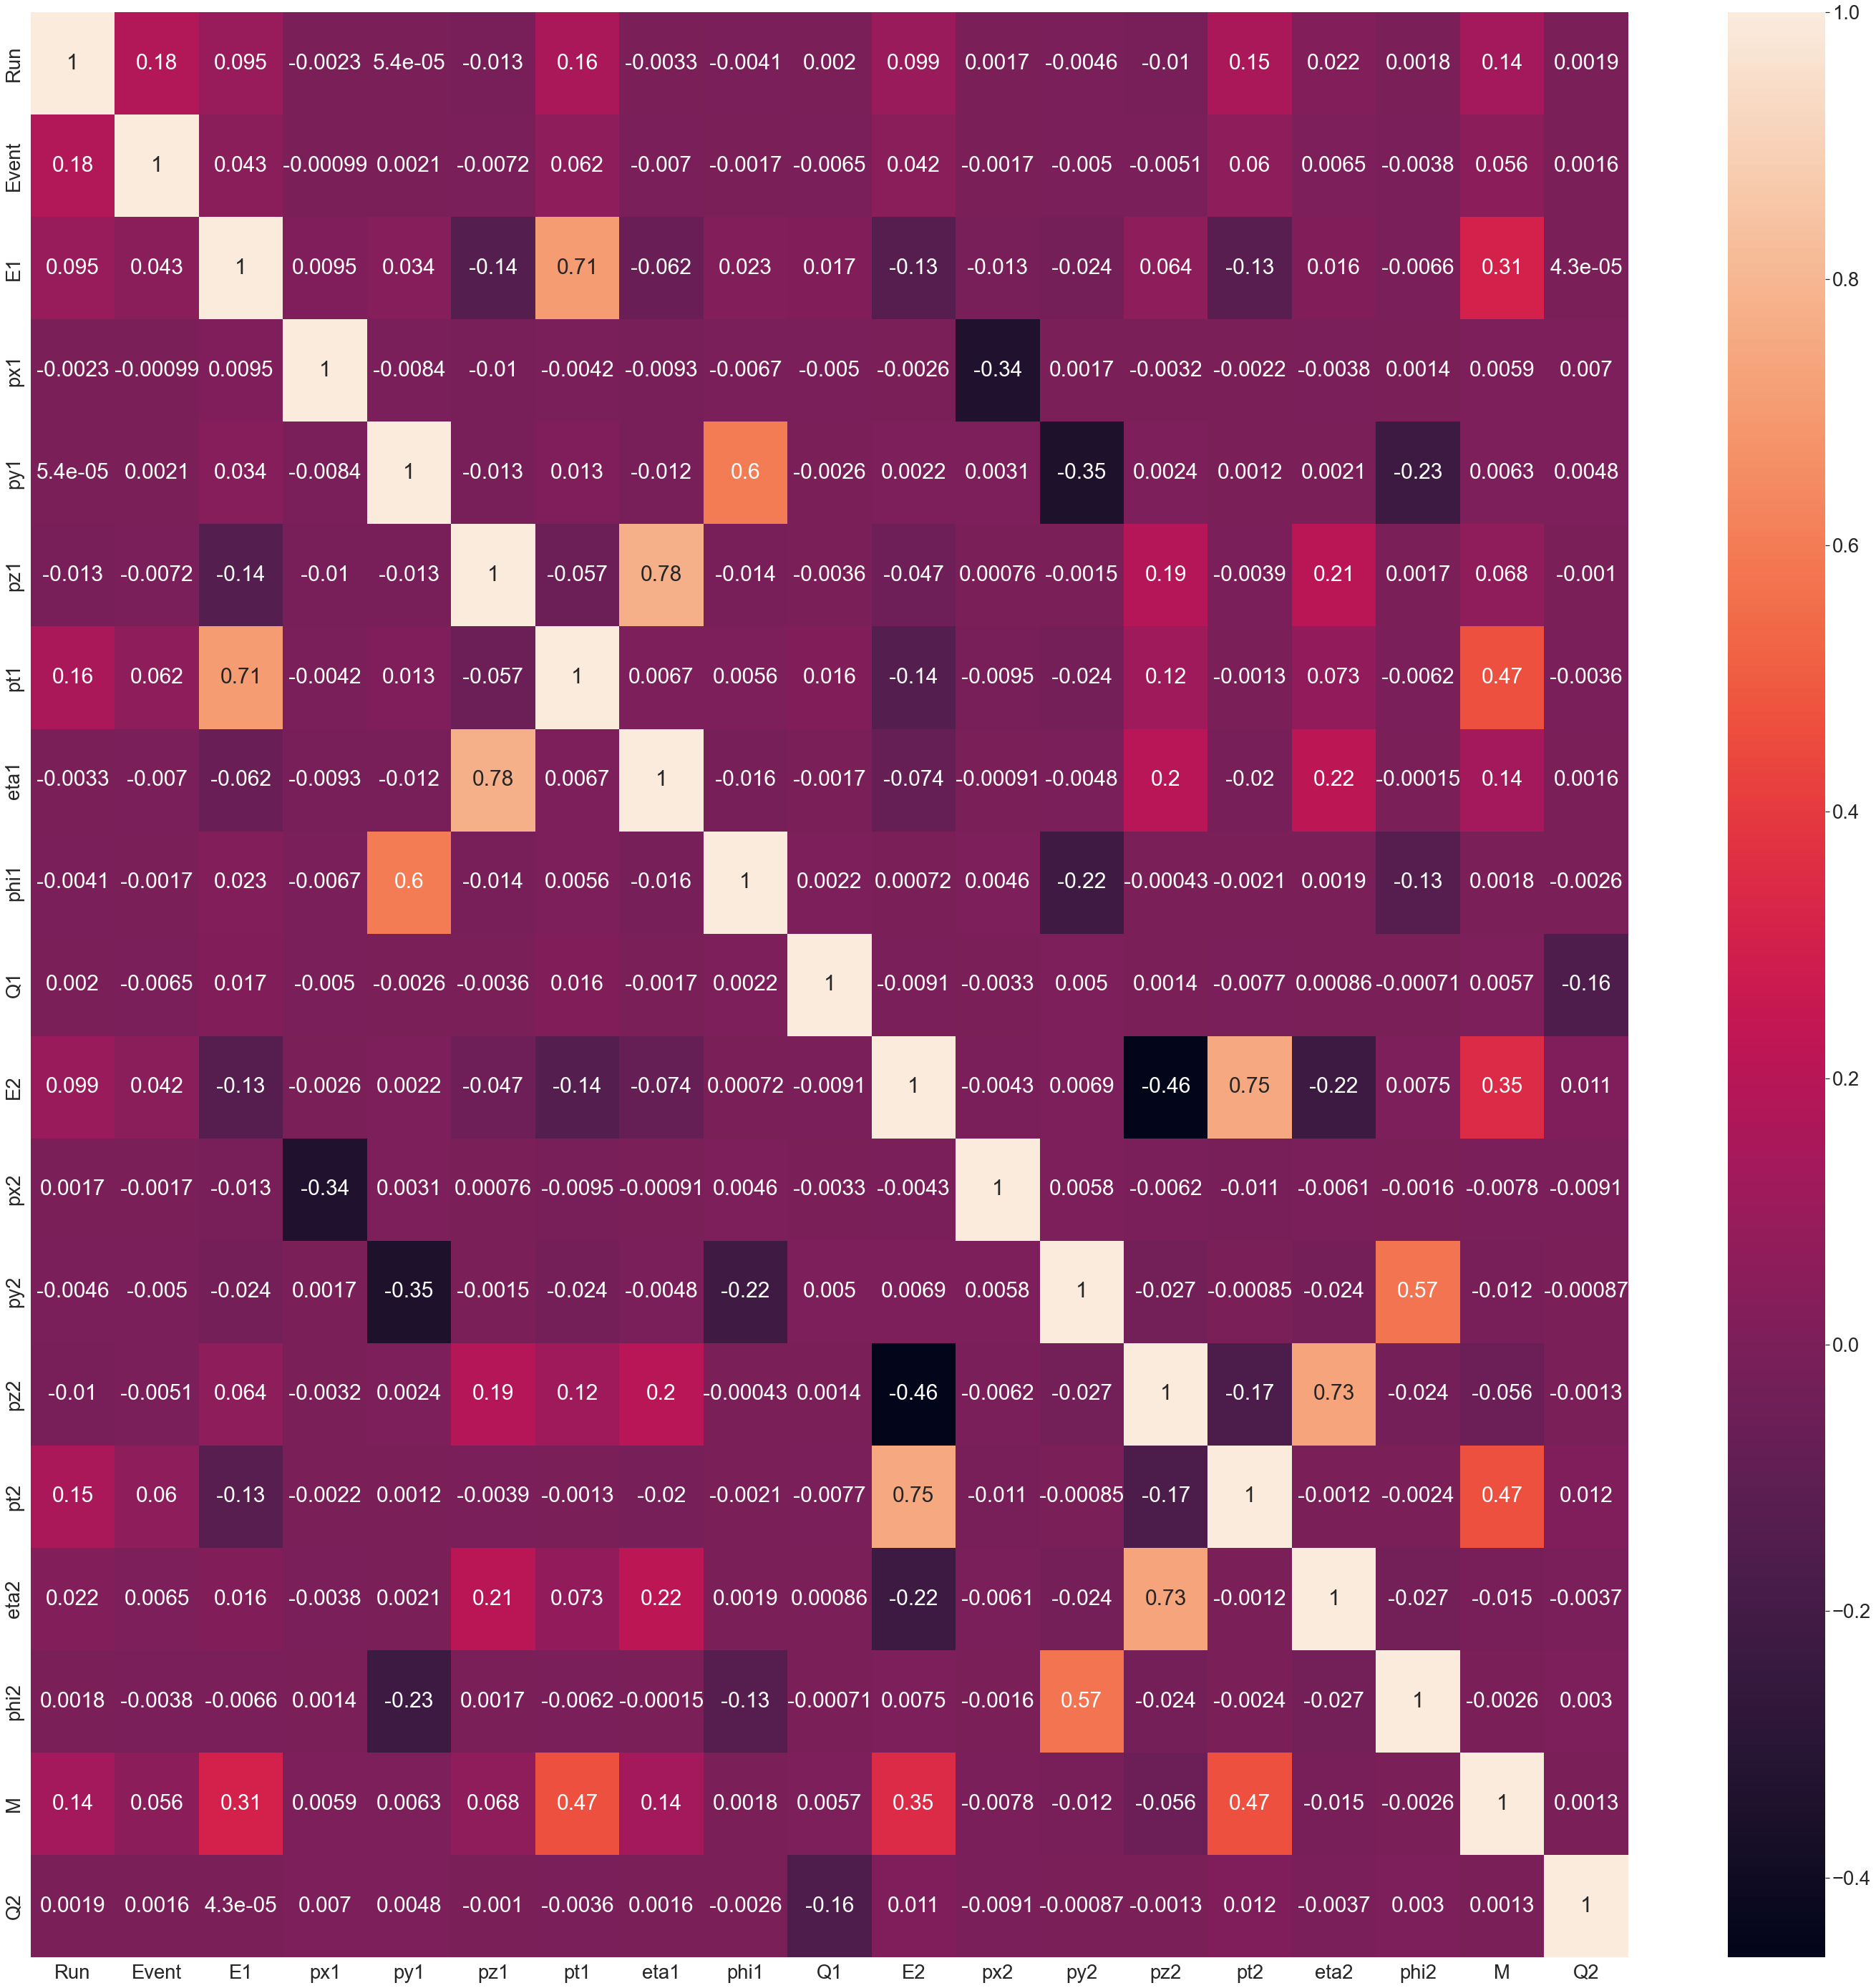

In [8]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(50, 50))
ax = sns.heatmap(model.corr(), annot=True)
plt.show()

# Выбросы E1

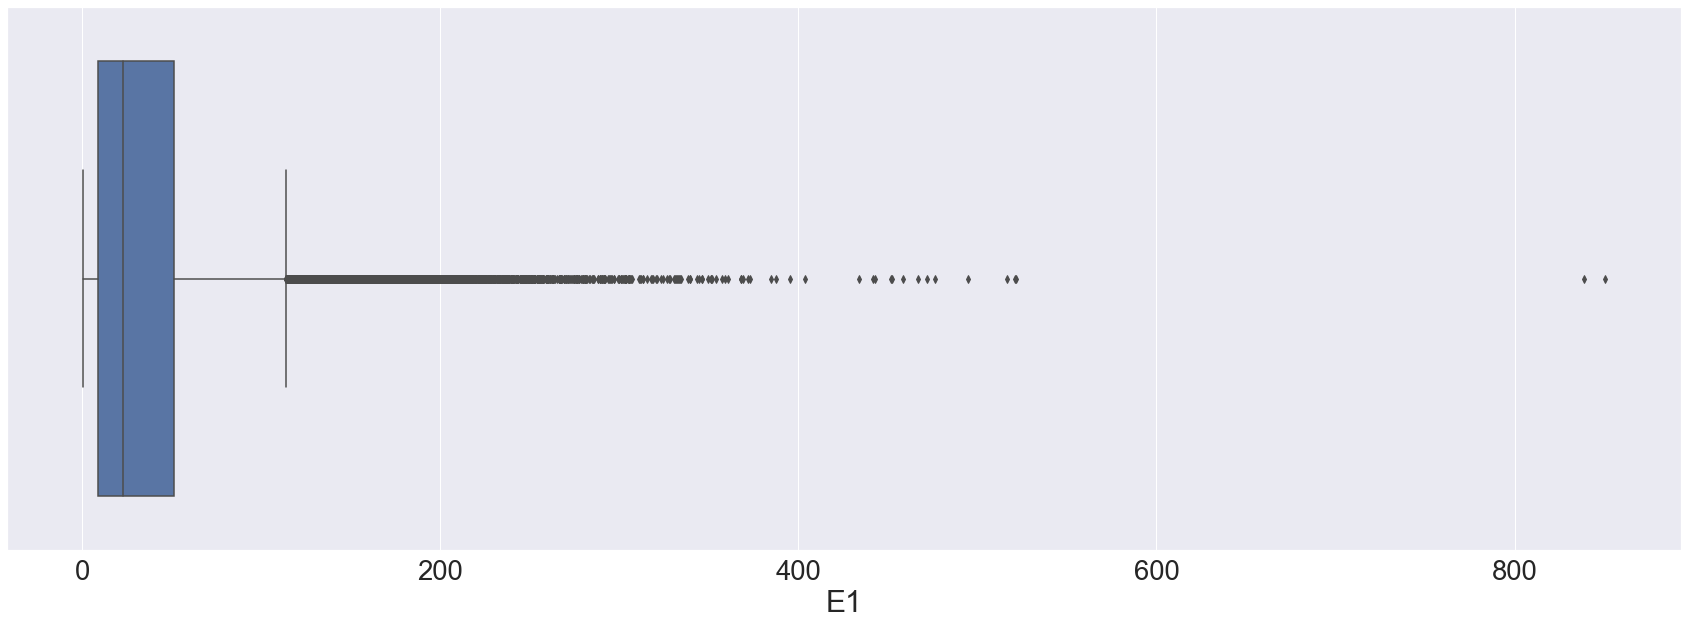

In [9]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["E1"])
plt.show()

In [10]:
model["E1"].mean()

37.04538145145214

In [11]:
lst_e1 = model["E1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>350:
        print(lst_e1[i])
        model["E1"][i] = 37.04538145145214

351.121


C:\Users\user\AppData\Local\Temp\ipykernel_2216\1055605294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["E1"][i] = 37.04538145145214


452.105
403.473
387.55
372.674
471.926
458.153
358.75
433.634
360.475
357.107
521.519
395.375
838.83
368.016
384.758
451.851
367.908
466.529
441.755
371.661
442.655
521.058
351.794
353.911
351.35
494.841
850.602
476.107
516.635
369.128


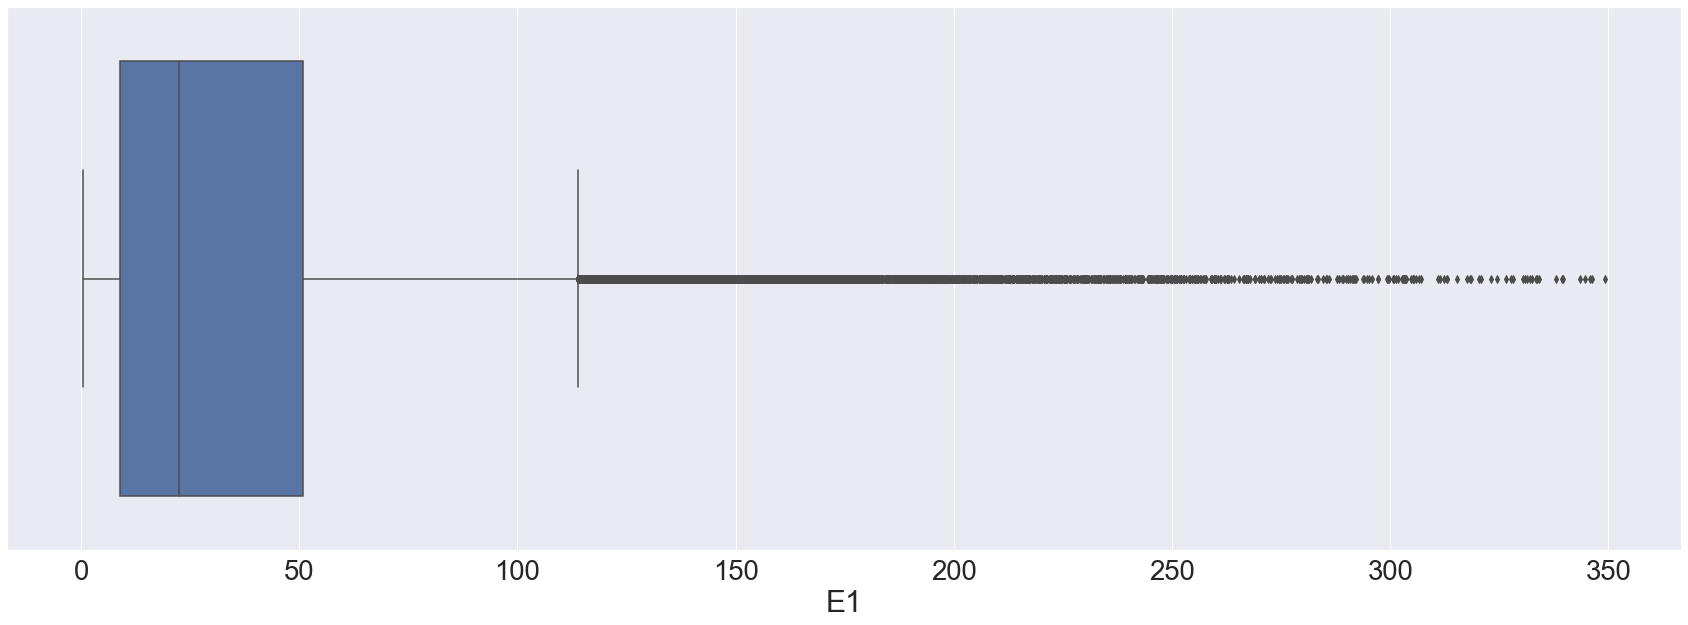

In [12]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["E1"])
plt.show()

# Выбросы px1

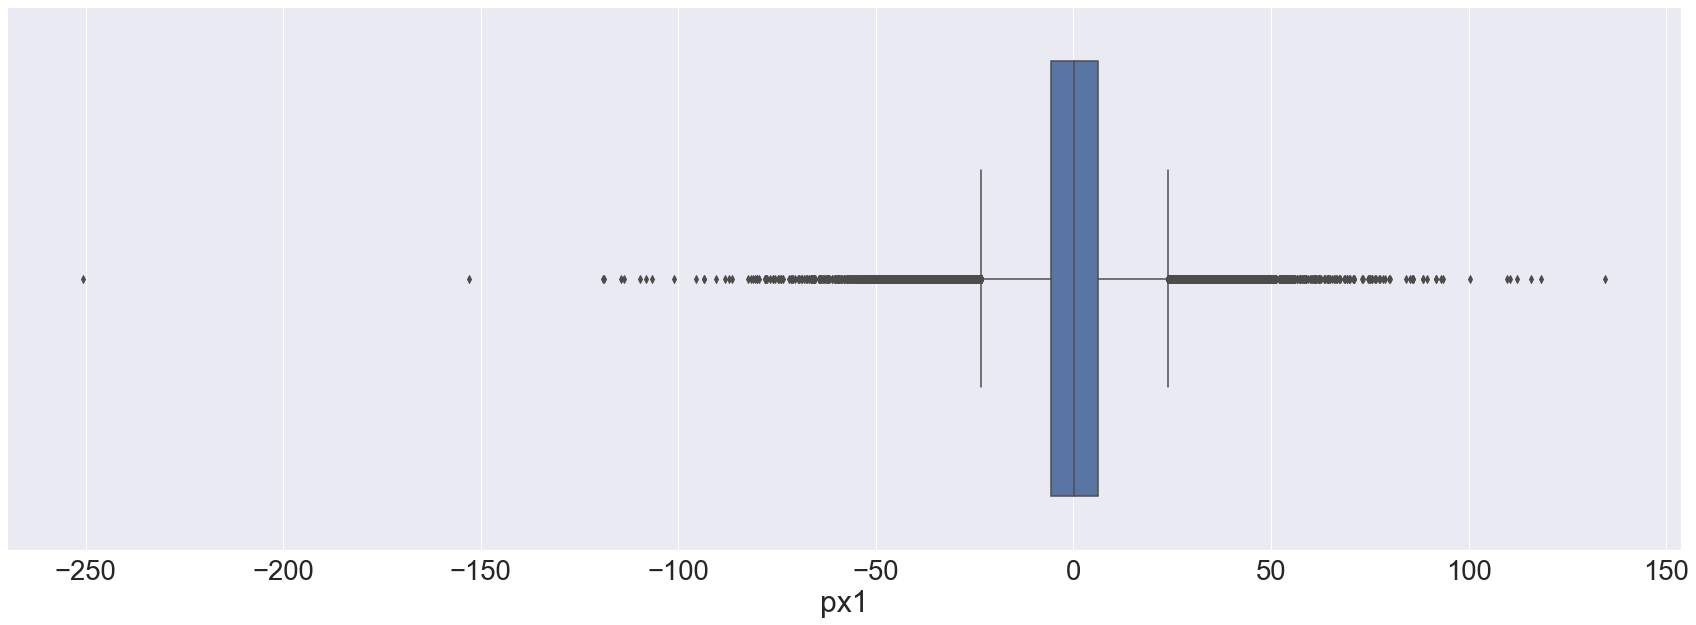

In [13]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["px1"])
plt.show()

In [14]:
model["px1"].mean()

0.1422316333266967

In [15]:
lst_e1 = model["px1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>75:
        print(lst_e1[i])
        model["px1"][i] = 0.1422316333266967

92.9988
100.259
91.6531
77.2434
75.0342
85.6698
109.628
88.5162
134.539
115.827
85.796
76.2156
78.3168
76.313
79.95
75.1554


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2026842330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["px1"][i] = 0.1422316333266967


85.8033
76.5016
110.438
77.5331
118.402
85.1765
84.2371
93.397
80.143
75.4955
88.5726
91.6405
112.147
75.4438
78.8543
89.5171


In [16]:
lst_e1 = model["px1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-75:
        print(lst_e1[i])
        model["px1"][i] = -1.1422316333266967

-80.0017
-106.594
-80.9824
-87.0665
-76.1277
-82.3039
-109.755
-118.885
-93.6259
-76.0187
-250.587
-90.3885
-152.969
-78.024
-78.1407
-75.4419
-114.531
-77.4371


C:\Users\user\AppData\Local\Temp\ipykernel_2216\4003519431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["px1"][i] = -1.1422316333266967


-101.058
-80.1193
-80.6183
-79.6738
-113.709
-81.5123
-77.9171
-86.5104
-88.1414
-76.7939
-108.088
-93.6254
-119.061
-77.7533
-95.4501


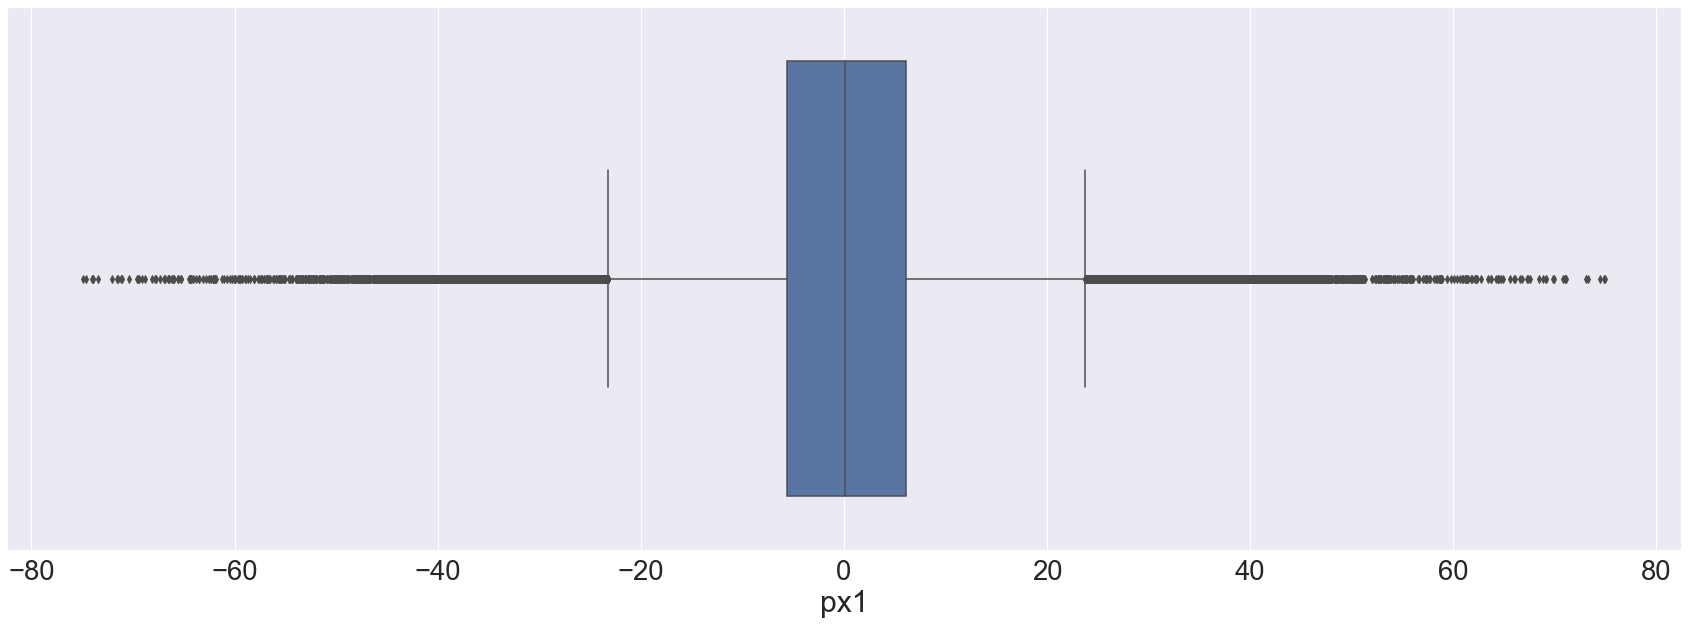

In [17]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["px1"])
plt.show()

# Выбросы py1

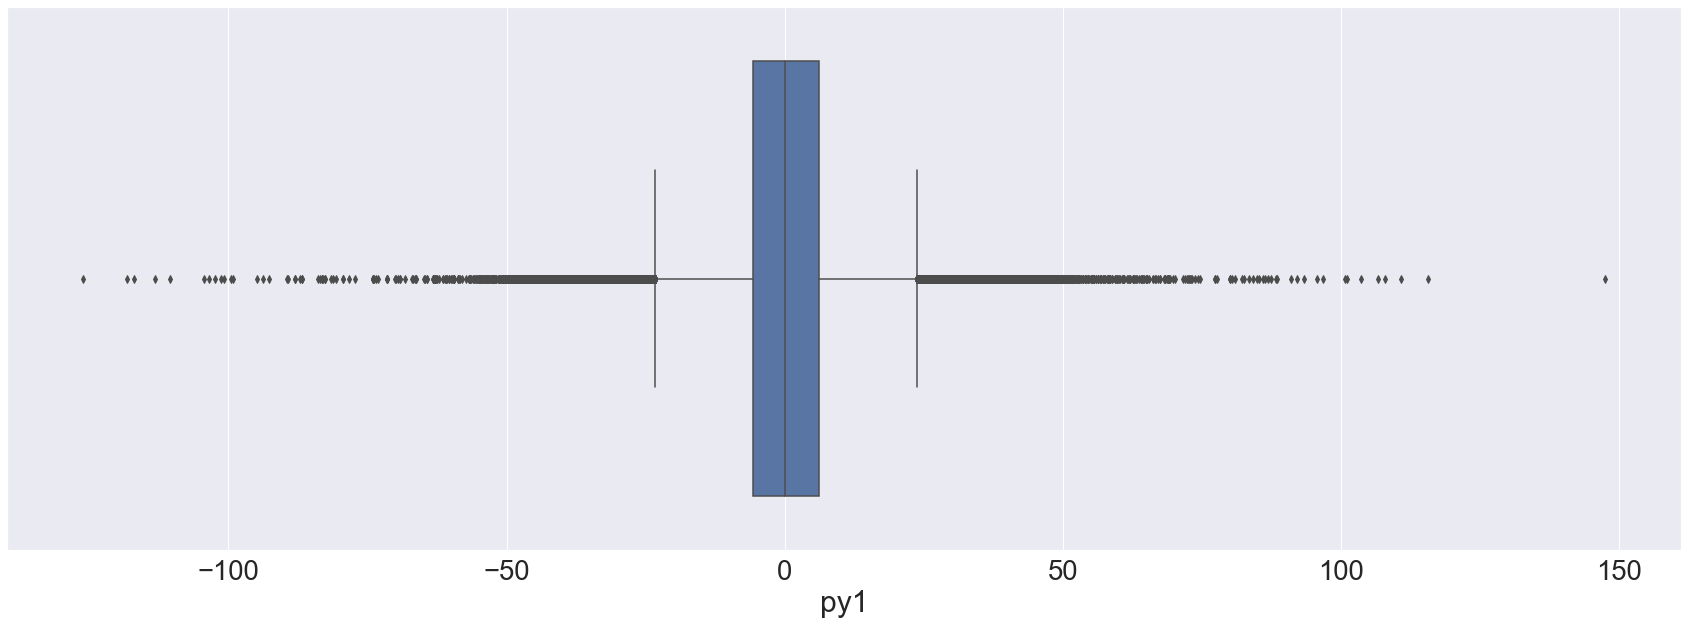

In [18]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["py1"])
plt.show()

In [19]:
model["py1"].mean()

0.21397679314325632

In [20]:
lst_e1 = model["py1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>75:
        print(lst_e1[i])
        model["py1"][i] = 0.21397679314325632

83.4955
96.7617
103.643
82.6252
82.1399
77.3456
85.3233
88.3375
86.8828
84.9837
80.0413
77.7726
86.2443
101.008
85.8883
80.4238


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2266834926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["py1"][i] = 0.21397679314325632


84.1588
79.9931
87.365
110.756
77.3261
147.467
93.2549
81.0231
92.1307
95.6123
107.88
115.639
90.9993
88.4299
106.717
100.724


In [21]:
lst_e1 = model["py1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-75:
        print(lst_e1[i])
        model["py1"][i] = 0.21397679314325632

-92.7722
-83.5567
-82.6112
-82.6472
-101.309
-104.294
-79.3725
-99.1307
-87.9652
-78.3142
-79.4107
-117.042
-81.1738
-126.079
-82.9095
-83.1842
-93.8248


C:\Users\user\AppData\Local\Temp\ipykernel_2216\1020649764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["py1"][i] = 0.21397679314325632


-77.29
-89.3574
-86.6946
-87.9672
-118.173
-110.449
-94.8299
-103.477
-89.4644
-100.721
-87.0691
-80.7046
-83.2393
-81.6327
-113.229
-102.388
-99.525
-83.9555
-86.7583


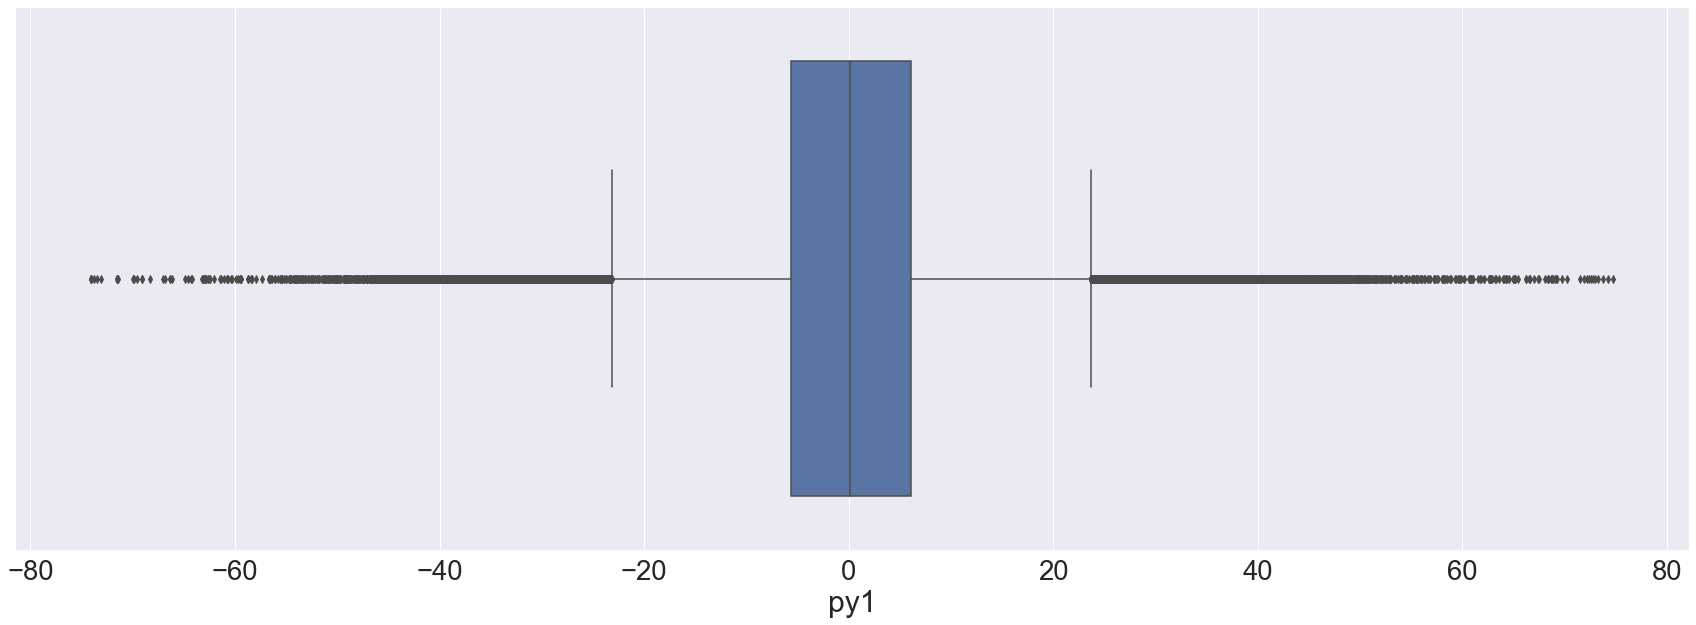

In [22]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["py1"])
plt.show()

# Выбросы pz1

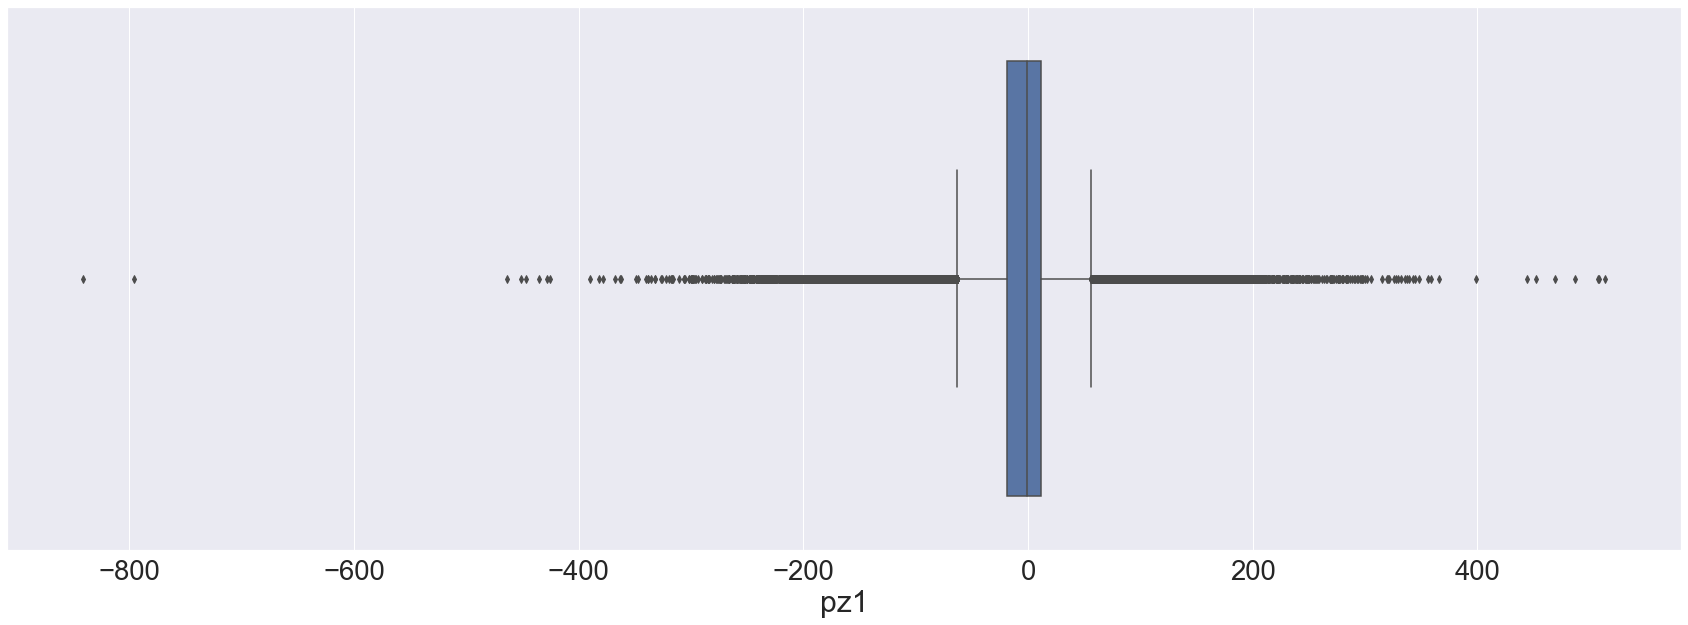

In [23]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pz1"])
plt.show()

In [24]:
model["pz1"].mean()

-4.112201356849164

In [25]:
lst_e1 = model["pz1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>300:
        print(lst_e1[i])
        model["pz1"][i] = 4.112201356849164

301.853
305.453
300.355
398.816
336.01
451.954
342.657
356.04
337.759
320.248
347.995
513.709


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2748279634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["pz1"][i] = 4.112201356849164


443.954
339.576
314.943
366.032
329.402
327.219
508.123
321.699
331.948
344.205
487.311
319.607
469.052
507.716
358.908
325.51


In [26]:
lst_e1 = model["pz1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-300:
        print(lst_e1[i])
        model["pz1"][i] = -4.112201356849164

-338.716
-331.823
-446.998
-316.789
-382.169
-367.412
-322.127
-301.556
-463.484
-326.119
-428.203
-306.288
-335.423
-389.942
-332.203
-795.679


C:\Users\user\AppData\Local\Temp\ipykernel_2216\3979797922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["pz1"][i] = -4.112201356849164


-362.936
-378.383
-362.156
-451.457
-302.045
-425.504
-316.02
-316.518
-338.14
-435.603
-310.27
-347.188
-348.964
-306.499
-326.779
-305.684
-317.806
-840.987
-319.26
-339.993


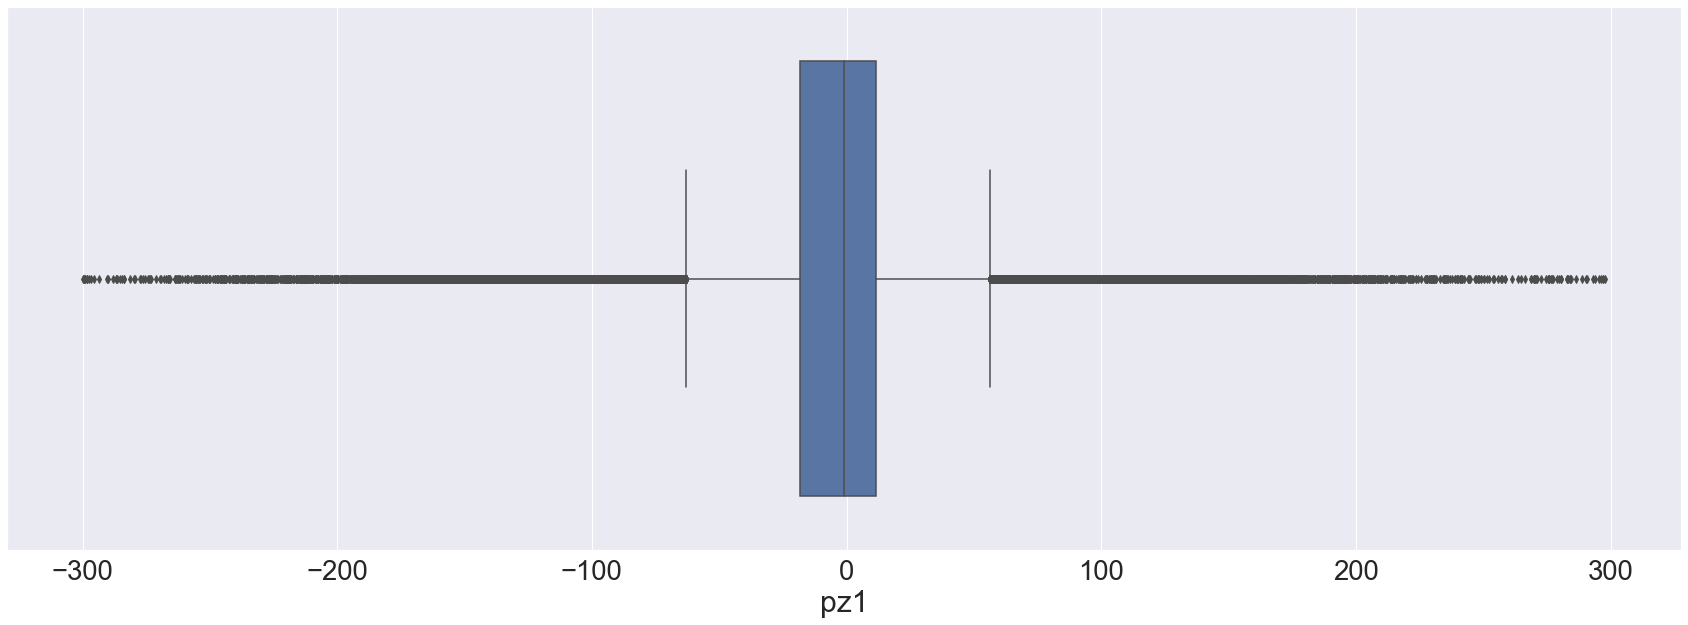

In [27]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pz1"])
plt.show()

# Выбросы pt1

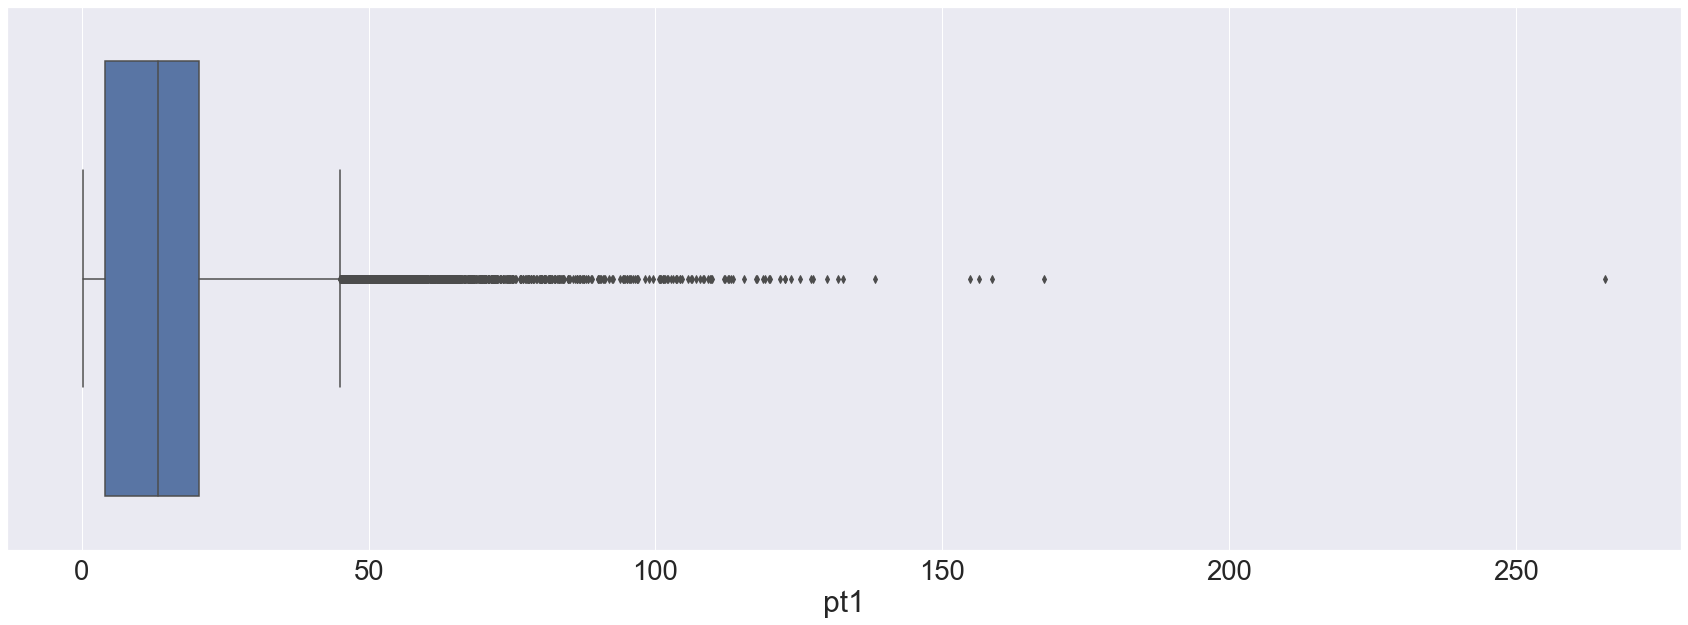

In [28]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pt1"])
plt.show()

In [29]:
model["pt1"].mean()

14.874175804880037

In [30]:
lst_e1 = model["pt1"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>110:
        print(lst_e1[i])
        model["pt1"][i] = 14.874175804880037

112.111
122.529
154.792
265.578
138.224
117.626
118.718
167.772
129.92
121.651
123.586
115.376
132.625
125.168
119.927
131.835
156.408
111.986


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2007330865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["pt1"][i] = 14.874175804880037


119.141
158.681
117.617
127.532
127.081
112.717
122.641
113.607
119.737
113.168
112.908


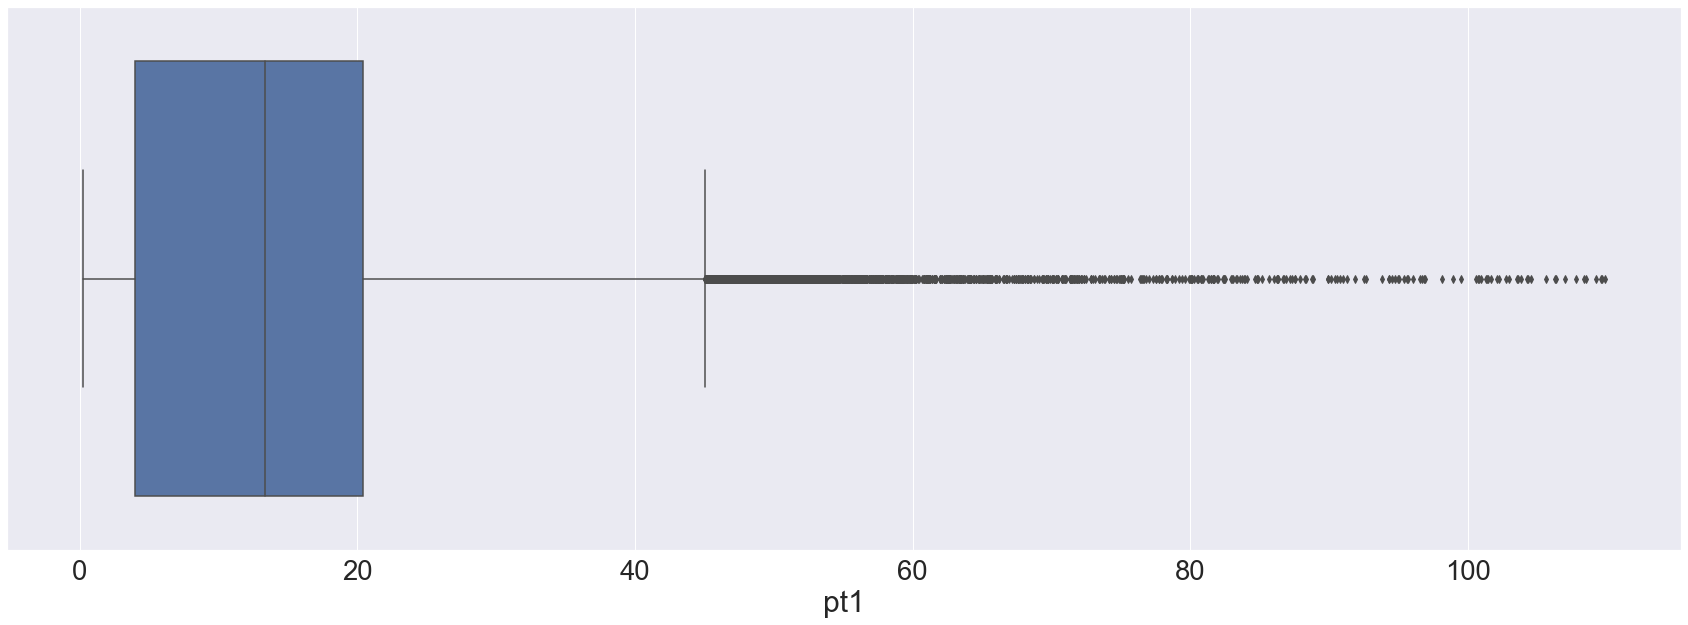

In [31]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pt1"])
plt.show()

# Выбросы eta1 

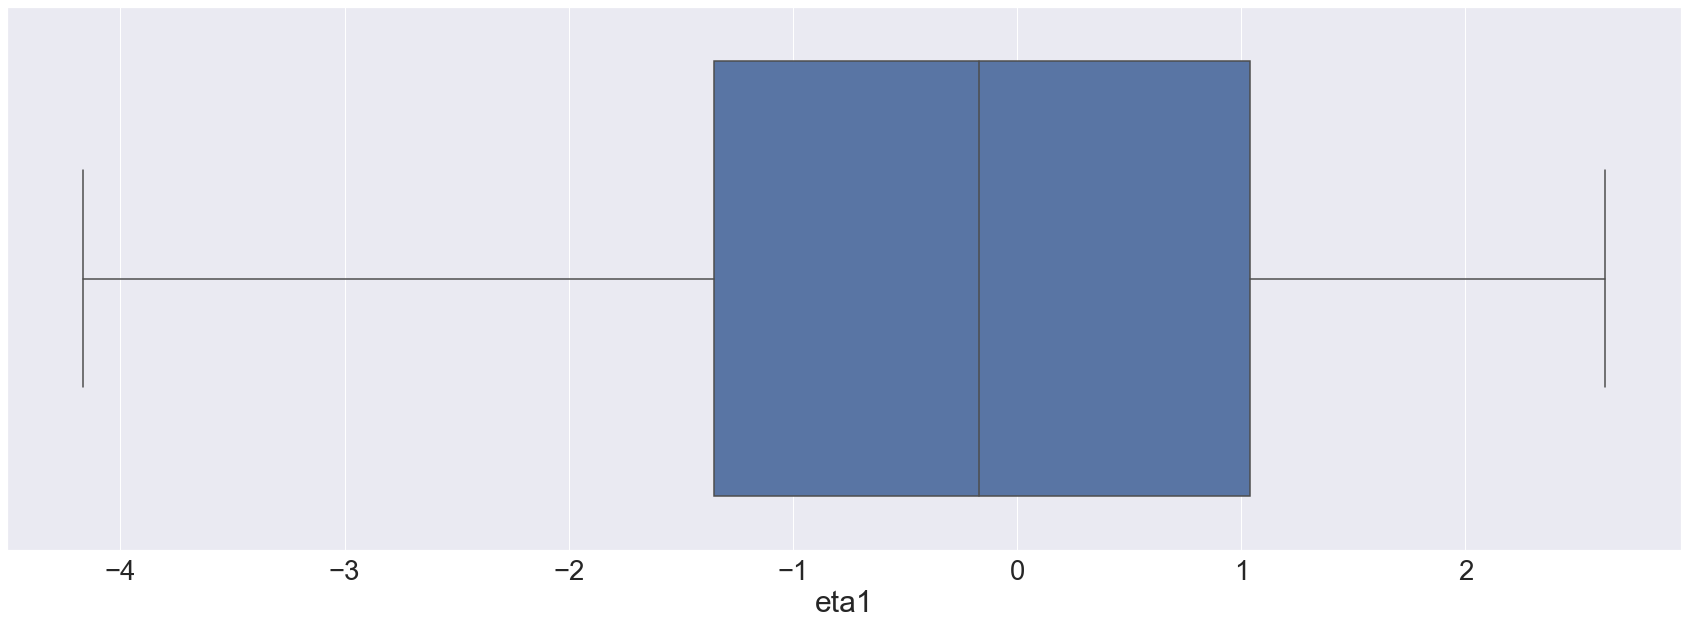

In [32]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["eta1"])
plt.show()

# Выбросы phi1

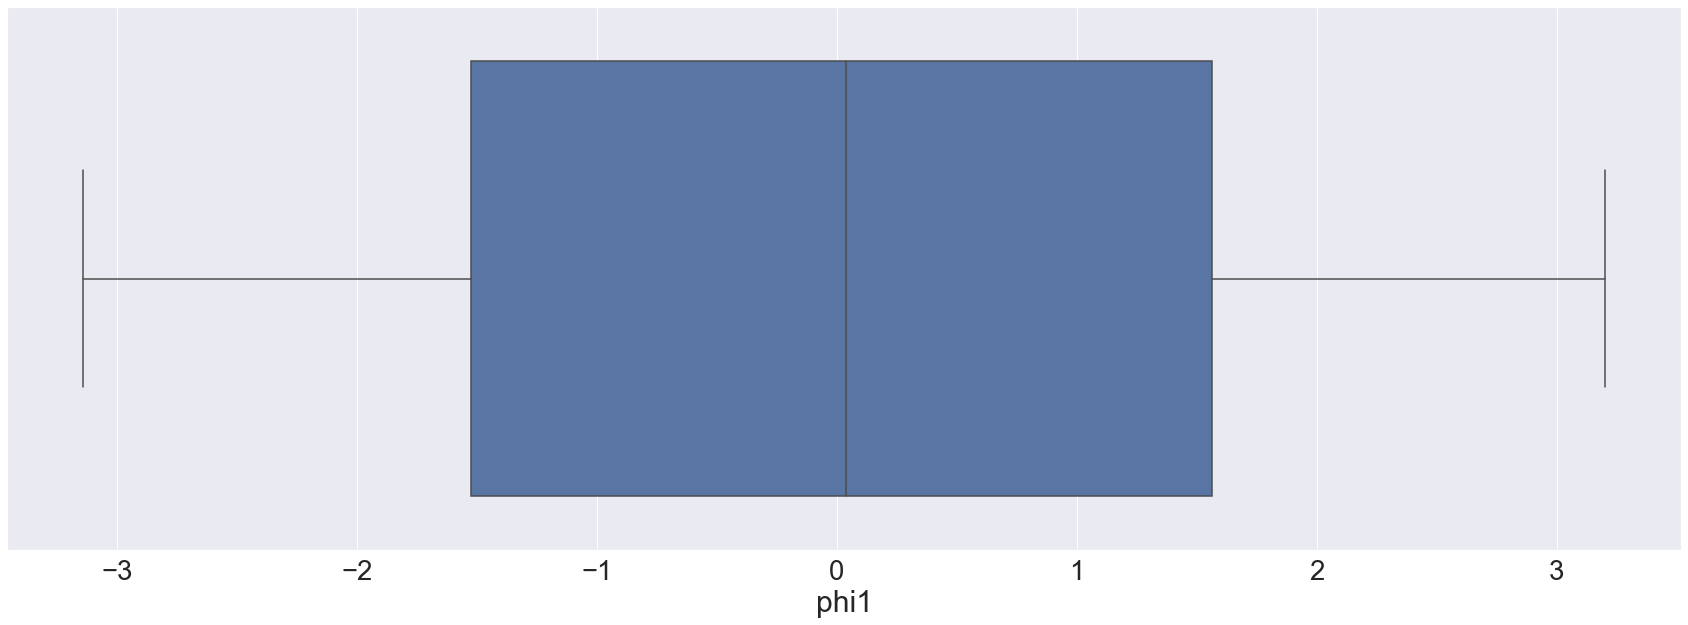

In [33]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["phi1"])
plt.show()

# Выбросы E2

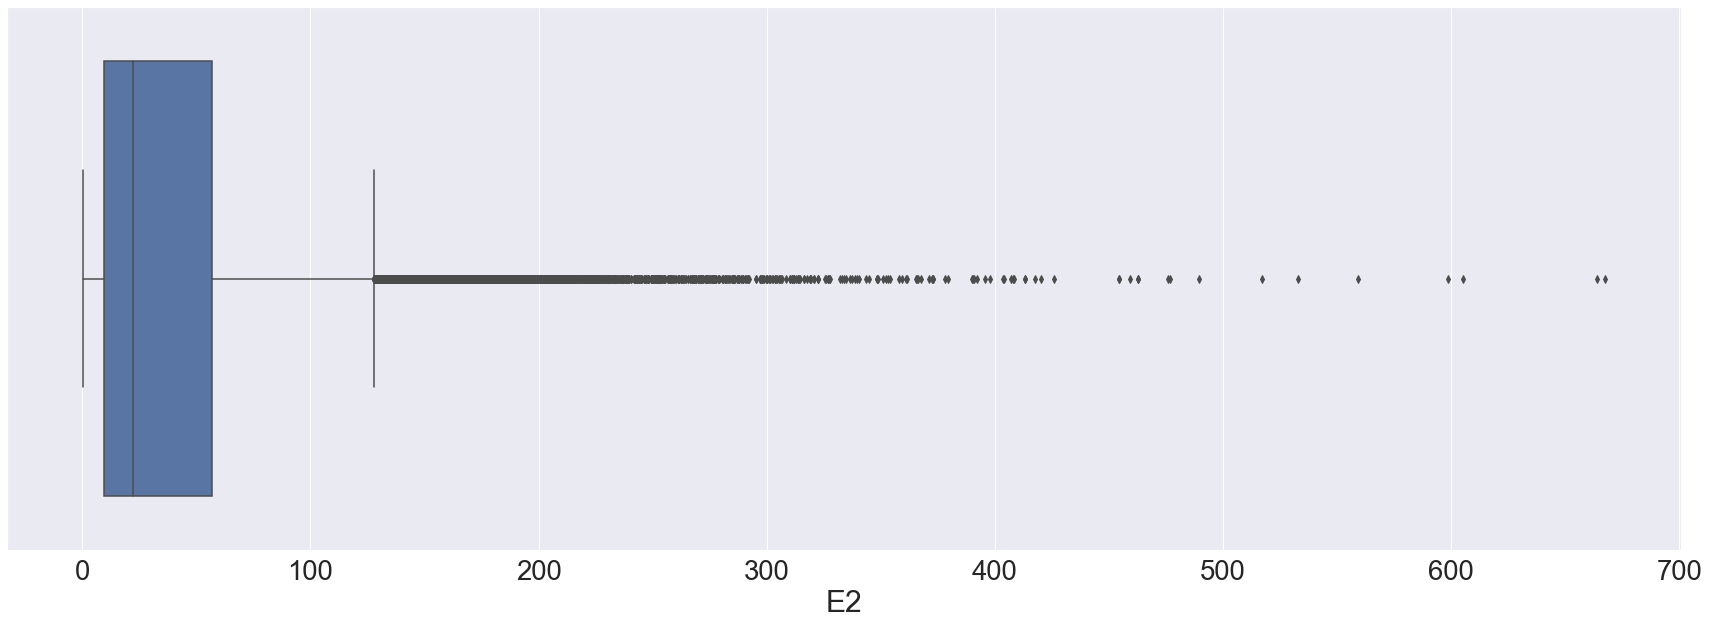

In [34]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["E2"])
plt.show()

In [35]:
model["E2"].mean()

38.98299719194324

In [36]:
lst_e1 = model["E2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>370:
        print(lst_e1[i])
        model["E2"][i] = 38.98299719194324

372.76
397.689
489.638
413.171
391.034
413.222
378.161
406.955
395.551
517.237
532.695
371.219
476.649
425.905
462.87
403.388
379.307


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2368816304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["E2"][i] = 38.98299719194324


454.454
604.974
407.776
462.79
390.284
404.185
372.67
389.943
420.039
459.282
417.761
372.391
408.437
559.0
475.935
663.953
392.104
667.45
454.242
598.728


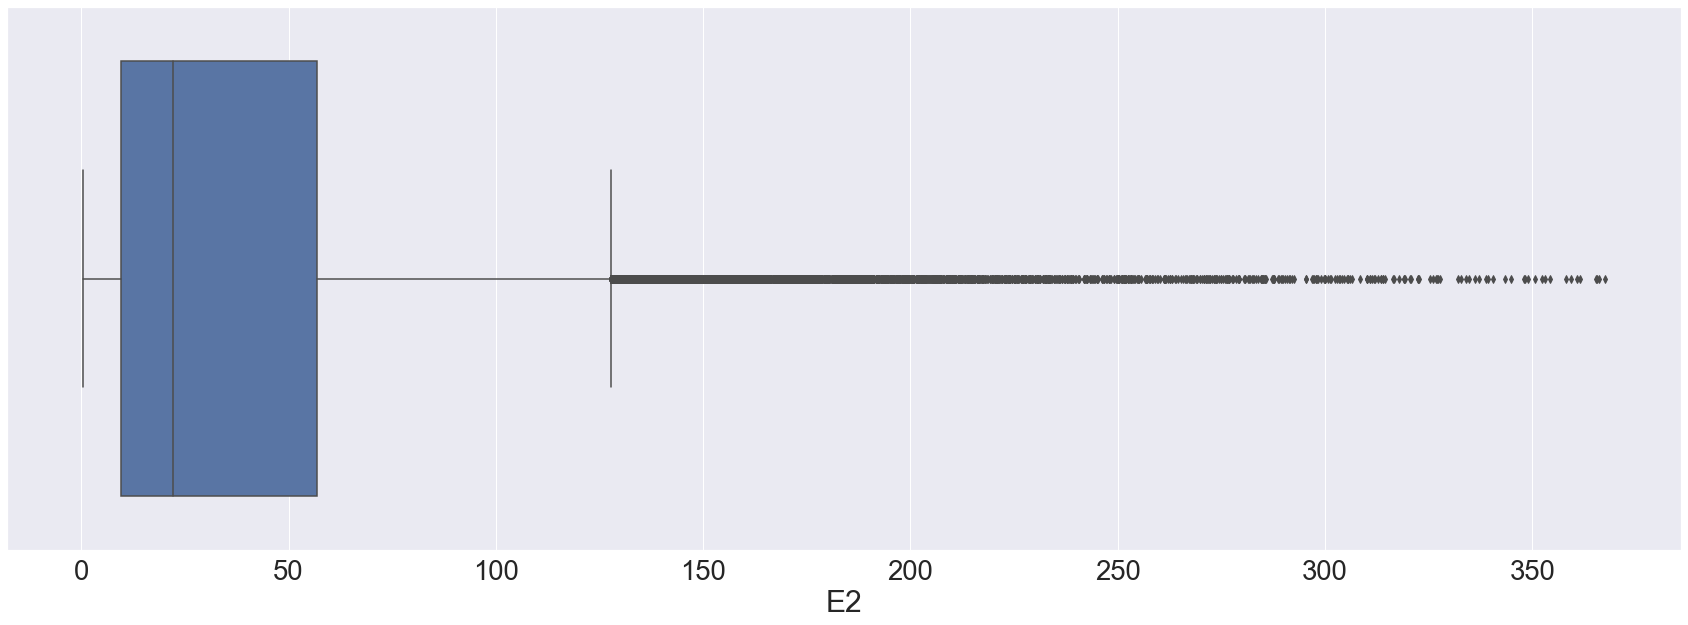

In [37]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["E2"])
plt.show()

# Выбросы px2

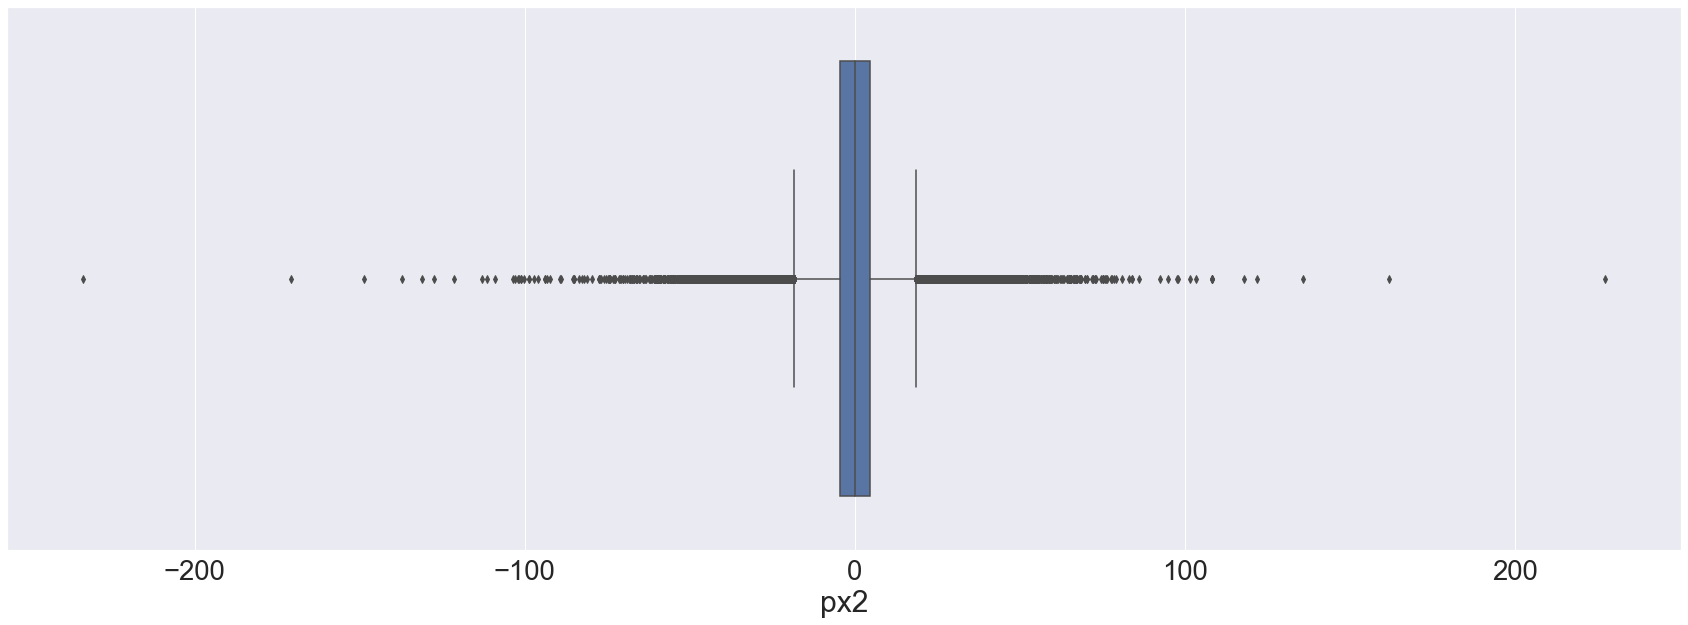

In [38]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["px2"])
plt.show()

In [39]:
model["px2"].mean()

-0.025255357597019714

In [40]:
lst_e1 = model["px2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>75:
        print(lst_e1[i])
        model["px2"][i] = -0.025255357597019714

84.0006
86.1559
101.645
108.36
97.7591
97.9788
108.149
78.4188
121.838
75.6746
103.359
79.1166
75.1322
83.8689
75.242
76.254
117.802


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2178014313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["px2"][i] = -0.025255357597019714


77.9102
161.983
83.1914
75.3106
227.33
75.2322
77.4834
75.2009
94.9913
92.5874
108.276
135.751
80.8824
76.4617


In [41]:
lst_e1 = model["px2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-75:
        print(lst_e1[i])
        model["px2"][i] = -0.025255357597019714

-81.1354
-88.8742
-97.1137
-82.5904
-137.093
-100.249
-93.3337
-170.926
-85.0173
-98.7008
-148.674
-103.63
-101.92
-85.2488
-98.7172
-77.4856
-77.5991


C:\Users\user\AppData\Local\Temp\ipykernel_2216\3452259008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["px2"][i] = -0.025255357597019714


-84.9207
-102.924
-93.9546
-77.1456
-79.7226
-85.127
-101.853
-75.4851
-111.342
-112.834
-92.4511
-81.9205
-95.87
-108.956
-93.9292
-89.3887
-131.003
-101.258
-233.73
-121.479
-83.4634
-76.7331
-127.53
-101.027
-75.9895


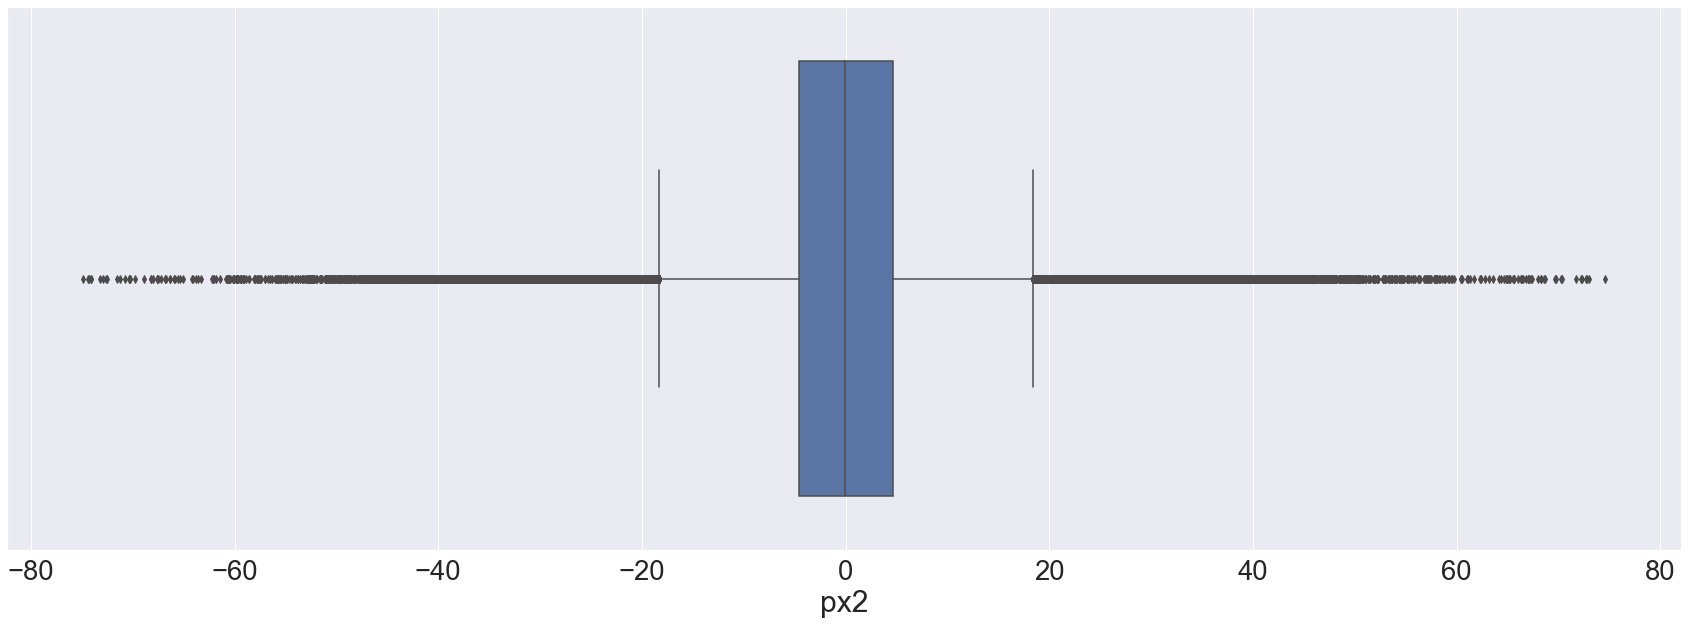

In [42]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["px2"])
plt.show()

# Выбросы py2

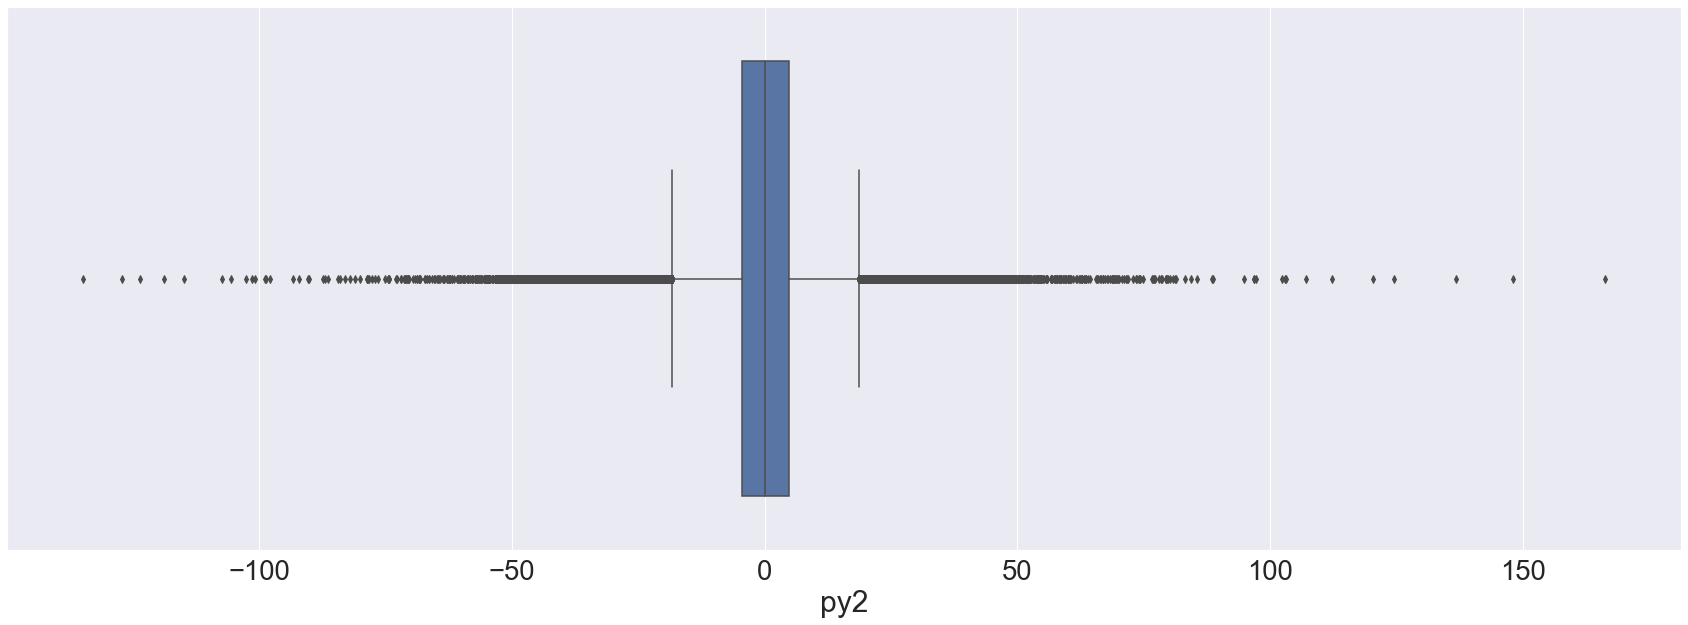

In [43]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["py2"])
plt.show()

In [44]:
model["py2"].mean()

0.16189843662010575

In [45]:
lst_e1 = model["py2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>75:
        print(lst_e1[i])
        model["py2"][i] = 0.16189843662010575

96.8819
80.1813
81.1735
112.27
80.7959
97.1466
85.465
83.0983
76.7336
77.1953
124.572
78.4541
120.411
102.967
78.6384
79.3915
102.344
79.609


C:\Users\user\AppData\Local\Temp\ipykernel_2216\4249146000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["py2"][i] = 0.16189843662010575


88.685
79.7884
79.4959
81.3856
84.4541
77.9895
79.4948
148.043
166.283
88.5245
107.103
76.8997
103.12
94.8958
77.0673
96.8744
136.814


In [46]:
lst_e1 = model["py2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-75:
        print(lst_e1[i])
        model["py2"][i] = 0.16189843662010575

-81.016
-127.048
-77.0486
-78.6416
-101.395
-78.3185
-83.0568
-87.2731
-76.4009
-80.0142
-134.753
-97.8151
-118.872
-86.3052
-78.6502
-107.261
-90.212


C:\Users\user\AppData\Local\Temp\ipykernel_2216\4175355929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["py2"][i] = 0.16189843662010575


-81.8967
-100.845
-78.3551
-93.3574
-102.524
-84.3739
-86.8912
-98.7882
-77.6198
-105.516
-114.814
-92.0492
-123.618
-98.5906
-90.039
-75.1625
-84.0238


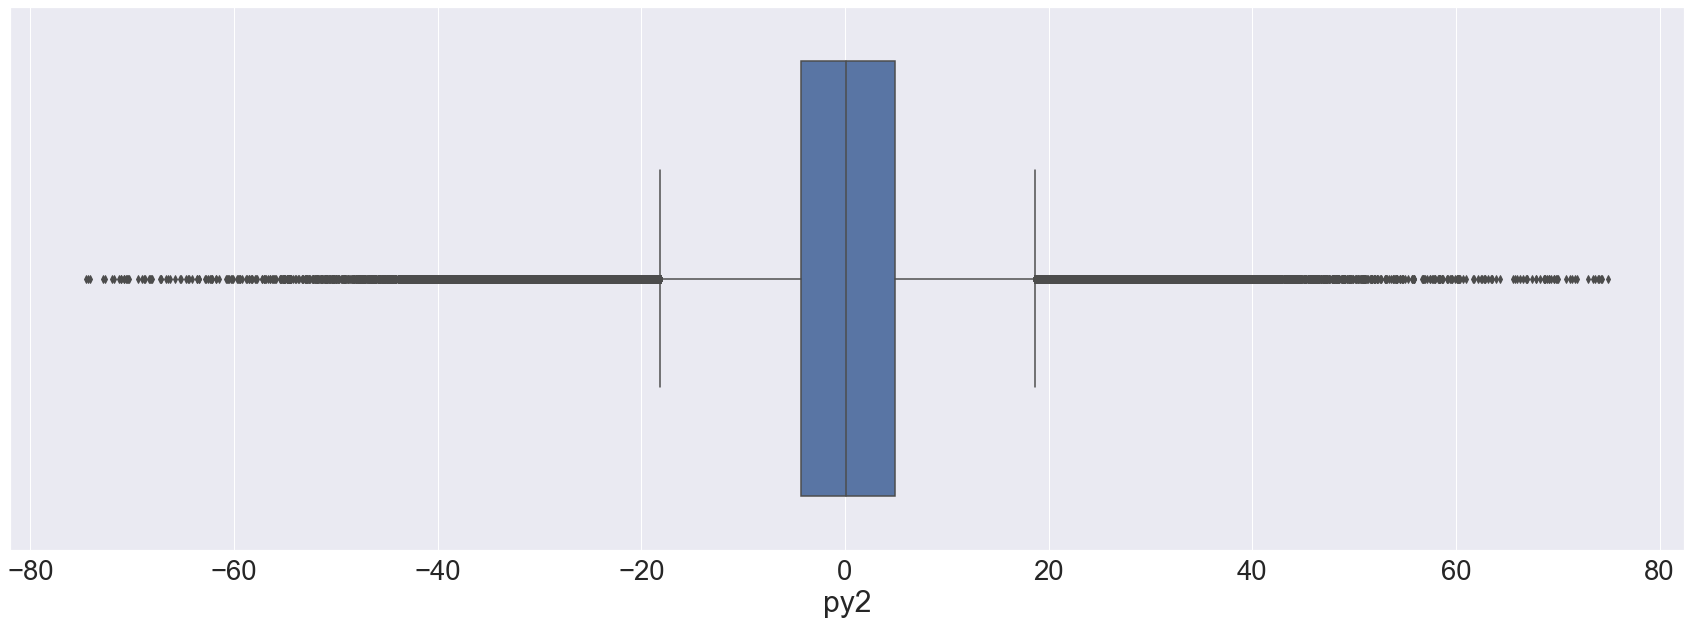

In [47]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["py2"])
plt.show()

# Выбросы pz2

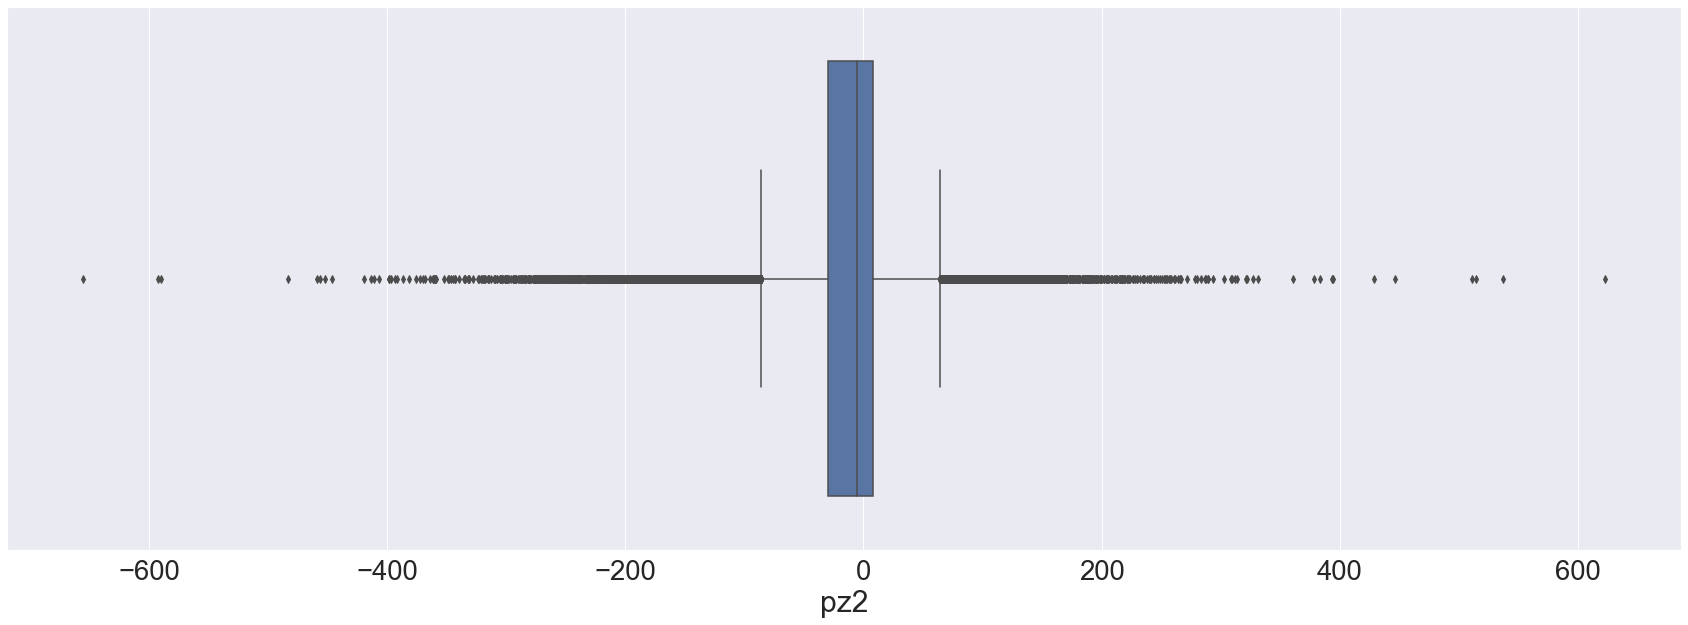

In [48]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pz2"])
plt.show()

In [49]:
model["pz2"].mean()

-14.394625425970327

In [50]:
lst_e1 = model["pz2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>300:
        print(lst_e1[i])
        model["pz2"][i] = -14.394625425970327

311.749
331.2
394.686
511.036
309.643
322.593
514.248
303.213
446.422
360.949
428.709
327.349
308.529
378.677
393.715
321.013


C:\Users\user\AppData\Local\Temp\ipykernel_2216\2070134087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["pz2"][i] = -14.394625425970327


314.178
537.23
383.647
623.049


In [51]:
lst_e1 = model["pz2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-350:
        print(lst_e1[i])
        model["pz2"][i] = -14.394625425970327

-368.093
-391.809
-483.434
-398.242
-375.713
-406.991
-372.574
-369.625
-361.818
-458.74
-419.833
-359.109
-352.428
-397.218
-592.946
-398.472
-360.068


C:\Users\user\AppData\Local\Temp\ipykernel_2216\3179577425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["pz2"][i] = -14.394625425970327


-456.147
-381.619
-393.562
-360.443
-364.517
-413.732
-452.014
-410.824
-361.603
-359.942
-655.396
-387.07
-446.166
-590.079


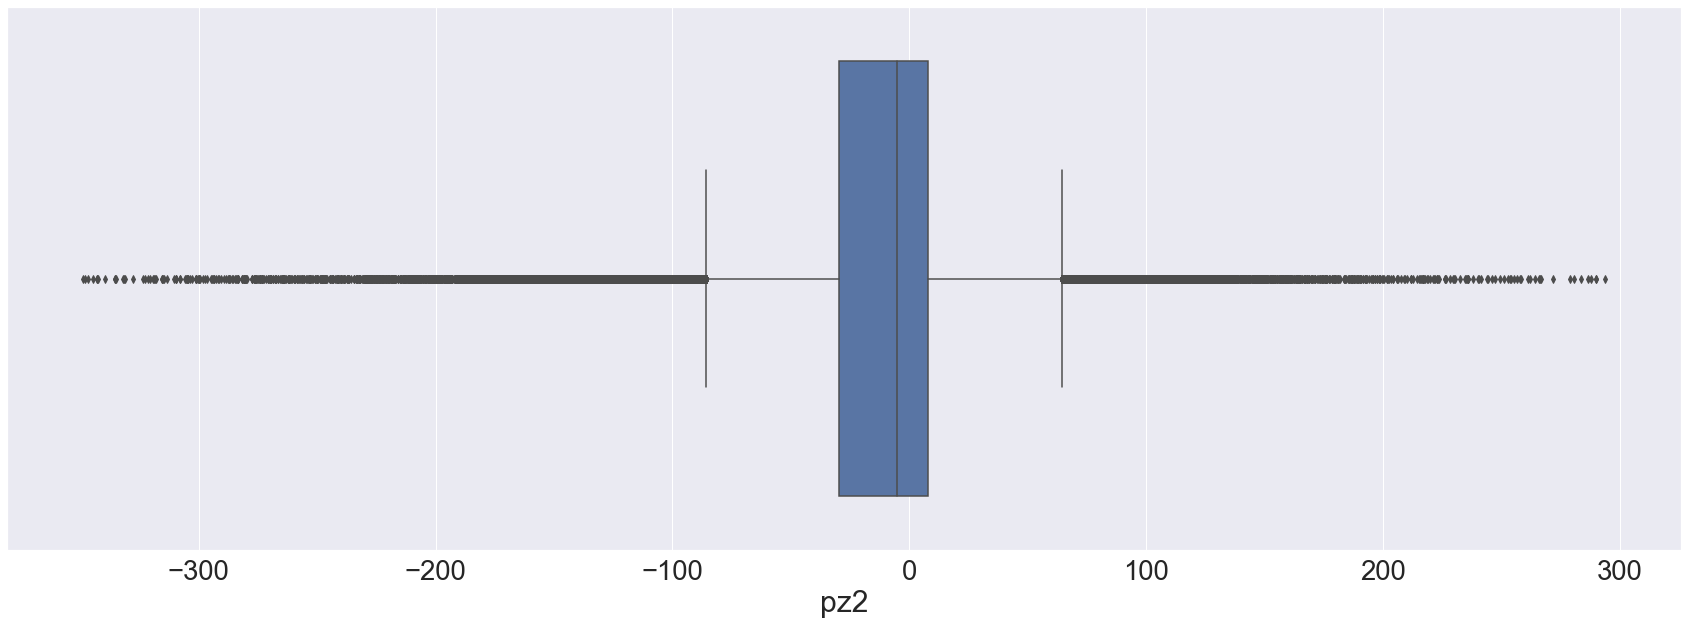

In [52]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pz2"])
plt.show()

# Выбросы pt2

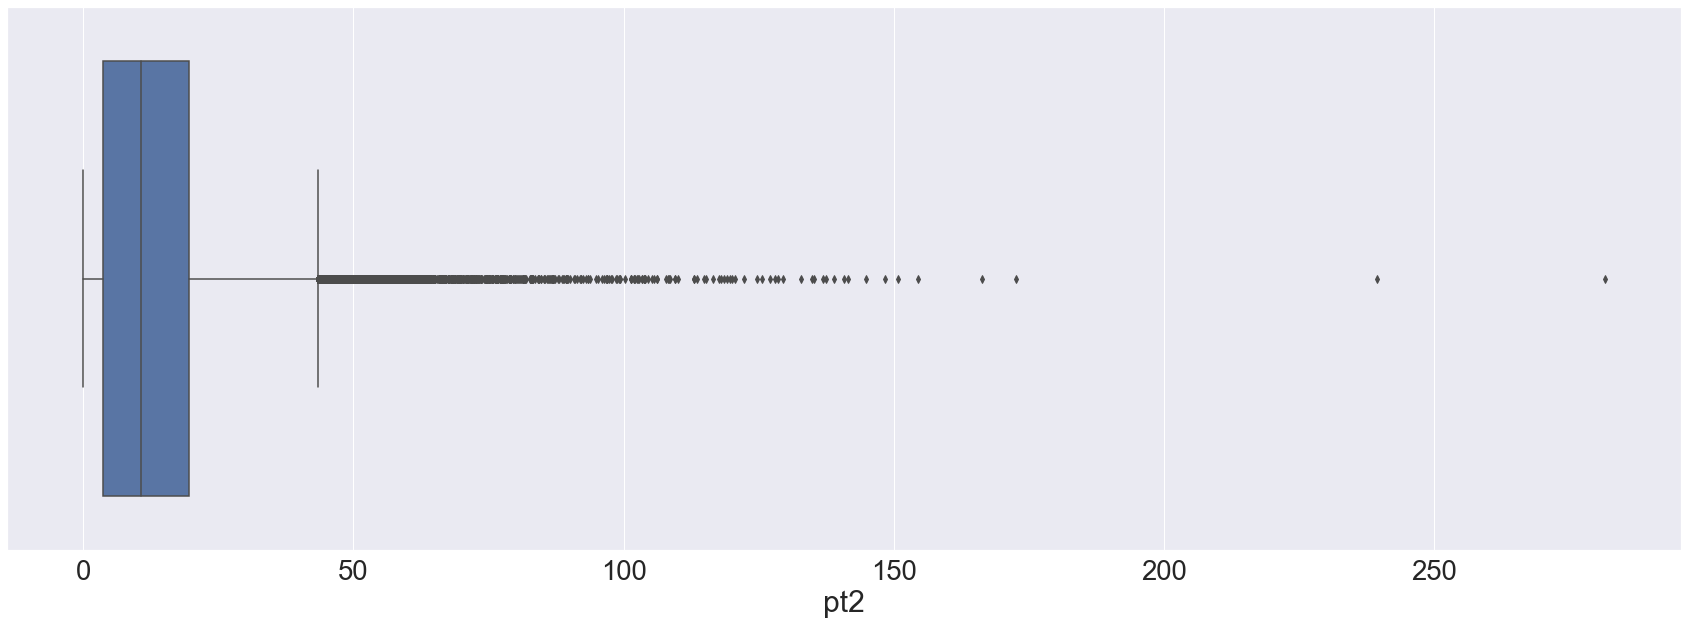

In [53]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pt2"])
plt.show()

In [54]:
model["pt2"].mean()

13.681966157705475

In [55]:
lst_e1 = model["pt2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]>110:
        print(lst_e1[i])
        model["pt2"][i] = 13.681966157705475

110.061
128.068
144.864
113.597
117.969
117.74
140.847
134.929
138.971
172.644
120.583
129.428
135.163
122.297
113.086
116.577
125.666
150.789
120.035


C:\Users\user\AppData\Local\Temp\ipykernel_2216\4254561918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["pt2"][i] = 13.681966157705475


112.978
119.223
119.738
154.483
166.319
115.32
148.424
281.654
118.545
124.668
137.538
127.149
239.373
132.921
114.816
128.587
141.468
136.928


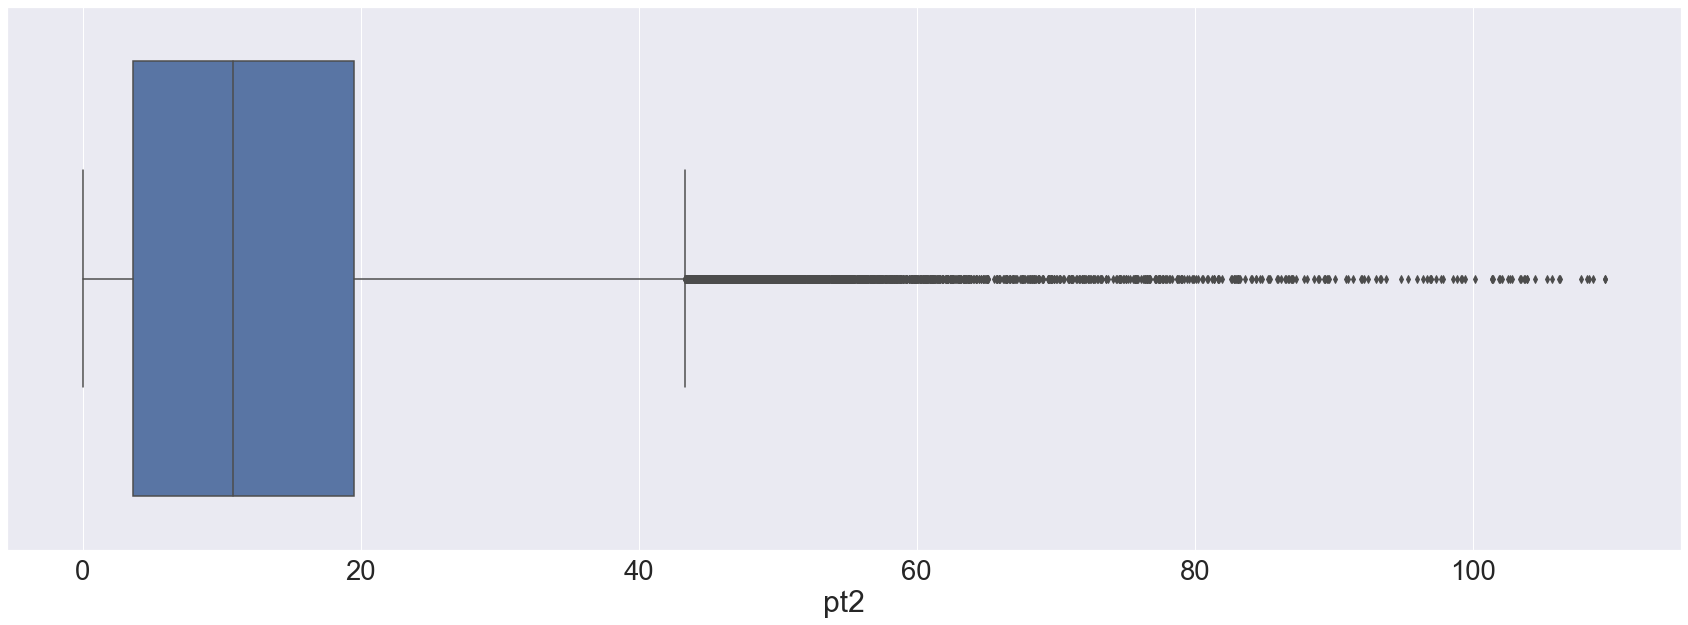

In [56]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["pt2"])
plt.show()

# Выбросы eta2

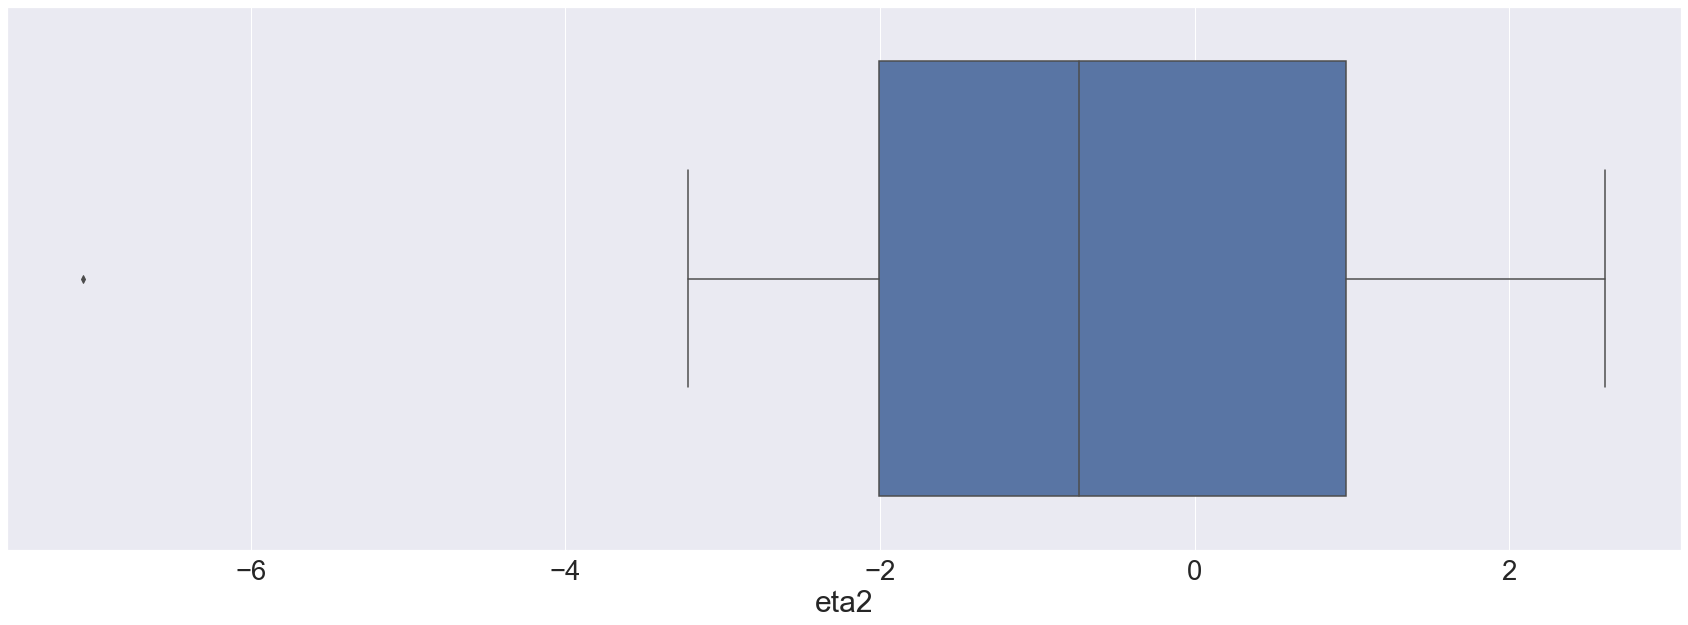

In [57]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["eta2"])
plt.show()

In [58]:
model["eta2"].mean()

-0.48658445763290964

In [59]:
lst_e1 = model["eta2"].values
for i in range(len(lst_e1)):
    if lst_e1[i]<-6:
        print(lst_e1[i])
        model["eta2"][i] = -0.48658445763290964

-7.06479


C:\Users\user\AppData\Local\Temp\ipykernel_2216\697603888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["eta2"][i] = -0.48658445763290964


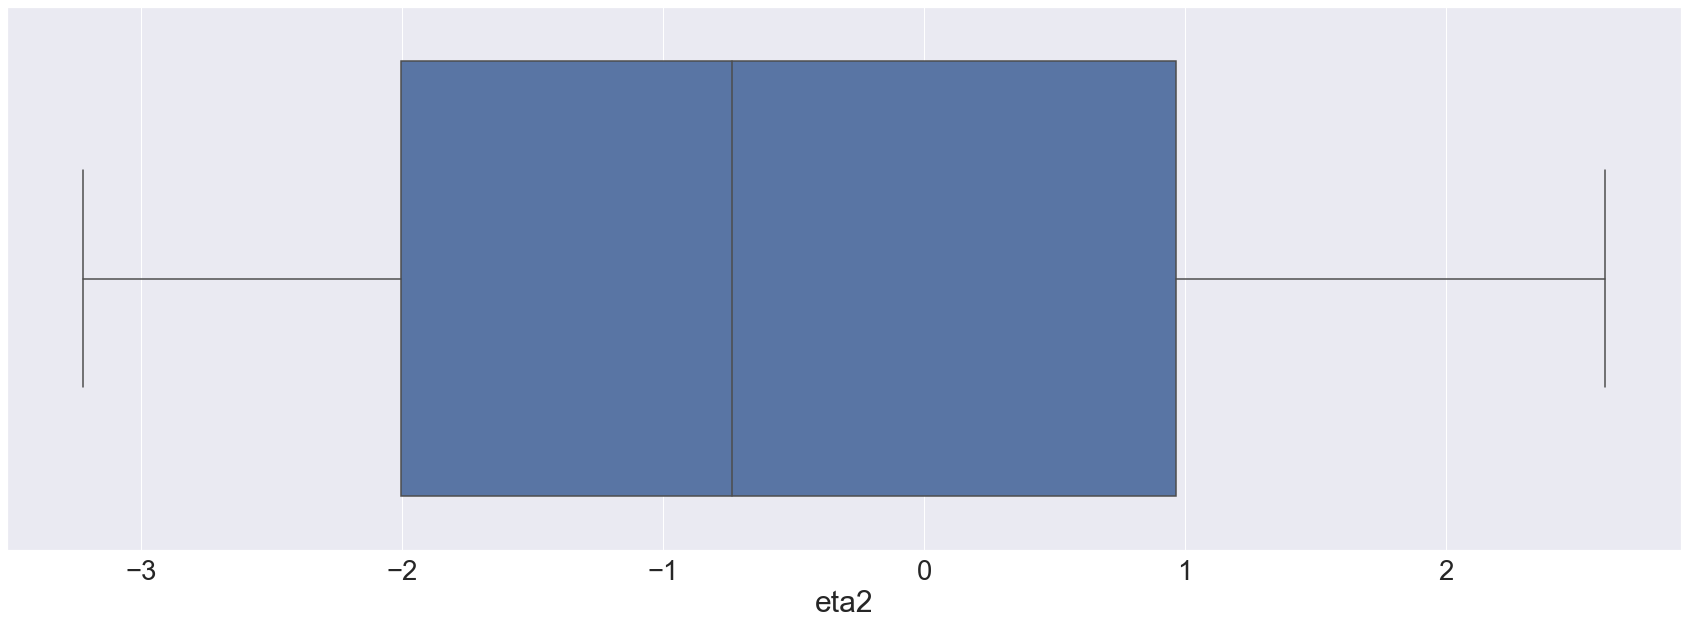

In [60]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["eta2"])
plt.show()

# Выбросы phi2

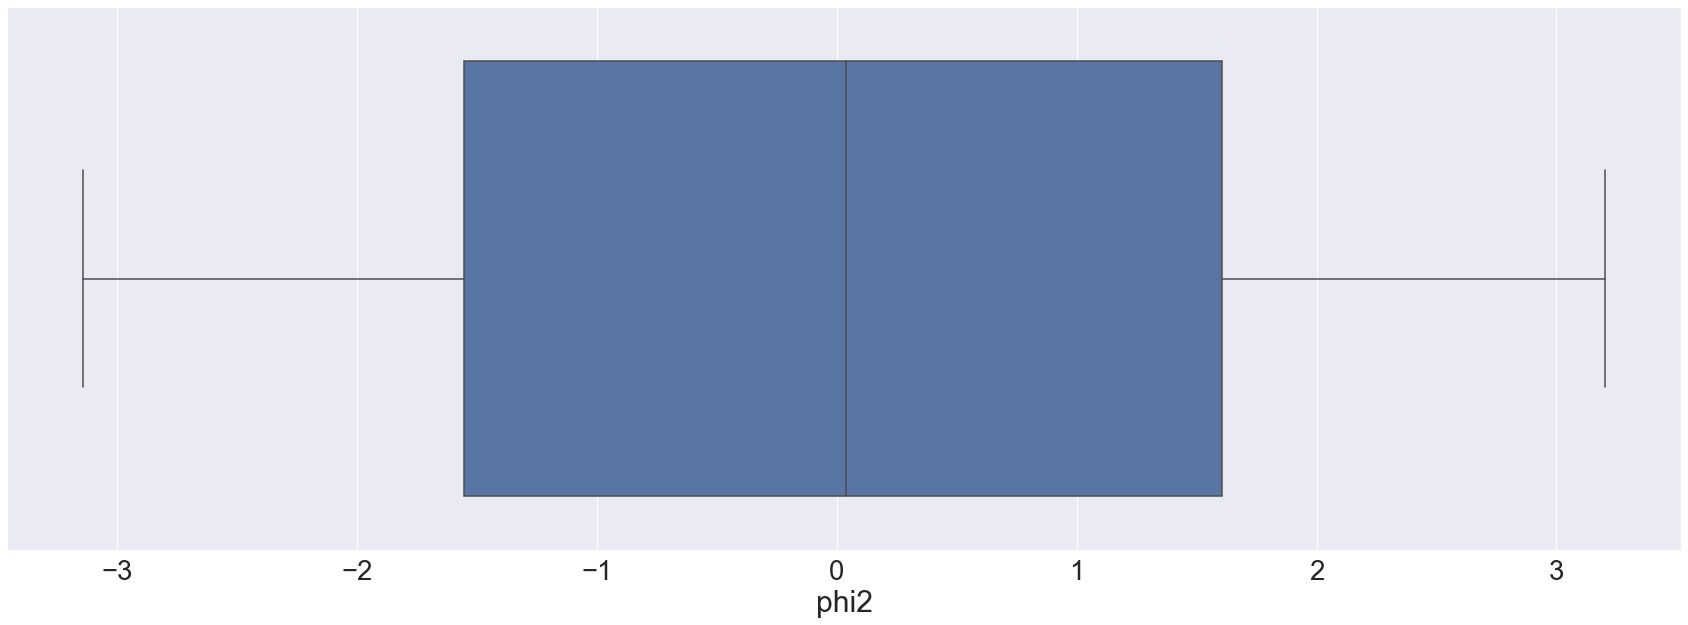

In [61]:
sns.set_theme(font_scale=2.5)
plt.figure(figsize=(30, 10))
bp = sns.boxplot(x = model["phi2"])
plt.show()

In [62]:
model.columns

Index(['Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'M', 'Q2'],
      dtype='object')

In [63]:
model['Q2'].value_counts()

-1    42682
 1    42317
Name: Q2, dtype: int64

# Создание фичей

In [64]:
def features(data, column):
    lst_log= []
    lst_kv = []
    lst_cub = []
    lst_fac = []
    lst_sin =[]
    lst_cos =[]
    lst_tan = []
    lst_exp =[]
    lst_abs=[]
    lst_artan =[]
    lst_log10=[]
    lst_arsin = []
    lst_arcos =[]
    lst_sinh=[]
    lst_cosh=[]
    lst_tanh=[]
    lst_std = []
    lst_skew = []
    
    
    for i in range(len(data[column])):
        num1 = np.log(abs(data[column][i]))
#         num2 = data[column][i]**0.5
        num3 = data[column][i]**2
        num4 = factorial(data[column][i])
        num5 = np.sin(abs(data[column][i]))
        num6 = np.cos(abs(data[column][i]))
        num7 = np.tan(abs(data[column][i]))
        num8 = round(np.exp(abs(data[column][i])), 9)
        num9 = abs(data[column][i])
        num10 = np.log10(abs(data[column][i]))
        num11 = np.arctan(abs(data[column][i]))
#         num12 =np.arcsin(abs(data[column][i]))
#         num13 = np.arccos(abs(data[column][i]))
        num12 = round(np.sinh(abs(data[column][i])),9)
        num13 = round(np.cosh(abs(data[column][i])),9)
        num14 = np.tanh(abs(data[column][i]))
        num15 = np.std(data[column][i])
        num16 = skew(data[column][i])
        lst_log.append(num1)
#         lst_kv.append(num2)
        lst_cub.append(num3)
        lst_fac.append(num4)
        lst_sin.append(num5)
        lst_cos.append(num6)
        lst_tan.append(num7)
        lst_exp.append(num8)
        lst_abs.append(num9)
        lst_log10.append(num10)
        lst_artan.append(num11)
        lst_sinh.append(num12)
        lst_cosh.append(num13)
        lst_tanh.append(num14)
        lst_std.append(num15)
        lst_skew.append(num16)
        lst_arsin.append(num12)
        lst_arcos.append(num13)
    data["log_" + column] = lst_log
#     data["kv_" + column] = lst_kv
    data["cub_" + column] = lst_cub
    data["fac_" + column] = lst_fac
    data["sin_" + column] = lst_sin
    data["cos_" + column] = lst_cos
    data["tan_" + column] = lst_tan
    data["exp_" + column] = lst_exp
    data["abs_" + column] = lst_abs
    data["log10_" + column] = lst_log10
    data["artan_" + column] = lst_artan
    data["sinh_" + column] = lst_sinh
    data["cosh_" + column] = lst_cosh
    data["tanh_" + column] = lst_tanh
    data["std_" + column] = lst_std
    data["skew_" + column] = lst_skew
    data["arsin_" + column] = lst_arsin
    data["arcos_" + column] = lst_arcos

In [65]:
lst_col = list(model.columns)
# print(lst_col)
col =[]
ch = ["Run","Event", "Q1", "Q2", "M"]
for i in range(len(lst_col)):
    if lst_col[i] not in ch:
        col.append(lst_col[i])
print(col)

['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2']


In [66]:
# log_feature(model, "px1")
for i in range(len(col)):
    features(model, col[i])
model

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["fac_" + column] = lst_fac
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["sin_" + column] = lst_sin
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["std_" + column] = lst_std
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["skew_" + column] = lst_skew
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["exp_" + column] = lst_exp
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["abs_" + column] = lst_abs
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["std_" + column] = lst_std
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["skew_" + column] = lst_skew
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["abs_" + column] = lst_abs
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["log10_" + column] = lst_log10
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["std_" + column] = lst_std
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["skew_" + column] = lst_skew
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,abs_phi2,log10_phi2,artan_phi2,sinh_phi2,cosh_phi2,tanh_phi2,std_phi2,skew_phi2,arsin_phi2,arcos_phi2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-1,...,2.596300,0.414355,1.203145,6.669733,6.744282,0.988946,0.0,0.0,6.669733,6.744282
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,...,2.198320,0.342091,1.143881,4.449437,4.560427,0.975662,0.0,0.0,4.449437,4.560427
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,...,2.884380,0.460052,1.237069,8.918291,8.974180,0.993772,0.0,0.0,8.918291,8.974180
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,...,1.258260,0.099770,0.899266,1.617572,1.901720,0.850584,0.0,0.0,1.617572,1.901720
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,...,1.961110,0.292502,1.099248,3.483255,3.623957,0.961174,0.0,0.0,3.483255,3.623957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84994,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,...,2.413270,0.382606,1.177959,5.540453,5.629975,0.984099,0.0,0.0,5.540453,5.629975
84995,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,...,0.844003,-0.073656,0.701002,0.947836,1.377822,0.687923,0.0,0.0,0.947836,1.377822
84996,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,...,1.428010,0.154731,0.959886,1.965303,2.205089,0.891258,0.0,0.0,1.965303,2.205089
84997,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,...,1.896180,0.277880,1.085488,3.255131,3.405272,0.955909,0.0,0.0,3.255131,3.405272


In [ ]:
model.isna().sum().sum()

In [67]:
model["Q1"] = model["Q1"].replace(-1,0)
model["Q2"] = model["Q2"].replace(-1,0)
model

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,abs_phi2,log10_phi2,artan_phi2,sinh_phi2,cosh_phi2,tanh_phi2,std_phi2,skew_phi2,arsin_phi2,arcos_phi2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,0,...,2.596300,0.414355,1.203145,6.669733,6.744282,0.988946,0.0,0.0,6.669733,6.744282
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,...,2.198320,0.342091,1.143881,4.449437,4.560427,0.975662,0.0,0.0,4.449437,4.560427
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,...,2.884380,0.460052,1.237069,8.918291,8.974180,0.993772,0.0,0.0,8.918291,8.974180
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,...,1.258260,0.099770,0.899266,1.617572,1.901720,0.850584,0.0,0.0,1.617572,1.901720
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,...,1.961110,0.292502,1.099248,3.483255,3.623957,0.961174,0.0,0.0,3.483255,3.623957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84994,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,0,...,2.413270,0.382606,1.177959,5.540453,5.629975,0.984099,0.0,0.0,5.540453,5.629975
84995,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,...,0.844003,-0.073656,0.701002,0.947836,1.377822,0.687923,0.0,0.0,0.947836,1.377822
84996,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,0,...,1.428010,0.154731,0.959886,1.965303,2.205089,0.891258,0.0,0.0,1.965303,2.205089
84997,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,0,...,1.896180,0.277880,1.085488,3.255131,3.405272,0.955909,0.0,0.0,3.255131,3.405272


In [140]:
# model = model.replace([np.inf, -np.inf], np.nan)
# model = model.dropna()

In [68]:
y = model['Q2']
X = model.drop(columns = ['Q2',"Run","Event"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

# Модели

В финальном решении использовал catboost

In [ ]:
rfc = RandomForestClassifier(max_depth=13, n_estimators=40,max_features=18)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

In [ ]:
clf = LogisticRegression(C=100, max_iter=100)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan',leaf_size=10, p=2, n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

In [ ]:
clf = LinearSVC(C=1,intercept_scaling=2, max_iter=2000,
          multi_class='ovr', penalty='l2', tol=0.2)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

In [144]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

0.575977721273762
0.5759602654426634


In [131]:
clf = CatBoostClassifier(iterations =3000,depth=8,learning_rate = 0.001,random_seed=777,loss_function ="CrossEntropy")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average = 'weighted'))

0.5894117647058823
0.5893871420313971


# Создание сабмита

In [ ]:
# checkkk = check.copy()
# checkkk

In [88]:
# check = check[check.columns[2:200]]

In [71]:
check

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
0,148029,100003381,65.06780,5.37255,13.700600,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.549710,3.45453,28.4490,5.71258,2.30852,0.649418,5.12717
1,148031,100042391,3.12536,2.22344,2.006790,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.820270,-21.85020,114.6190,22.88990,2.31389,-1.268240,31.50580
2,146511,100064781,71.24670,11.72080,4.581750,70.126500,12.58450,2.418930,0.372643,-1,66.1437,-12.588500,-4.71148,64.7636,13.44130,2.27616,-2.783460,26.07740
3,149181,100065292,95.40600,9.38112,-35.117300,-88.210400,36.34870,-1.619690,-1.309760,1,18.6863,1.748500,-3.03126,18.3557,3.49940,2.35946,-1.047590,80.98260
4,149181,1000680111,47.24090,-18.94710,-12.786300,41.342700,22.85790,1.354650,-2.547950,1,15.1625,-2.228880,-2.47818,14.7916,3.33305,2.19578,-2.303280,7.85455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,149181,999130482,2.26637,1.92784,0.238244,-1.167510,1.94251,-0.569712,0.122957,-1,129.8990,9.155200,27.15400,126.6990,28.65590,2.19215,1.245610,28.92070
14594,149181,99928075,22.22680,4.49565,-5.110490,21.159000,6.80646,1.852260,-0.849316,-1,60.8534,9.251770,-9.22728,59.4340,13.06670,2.21982,-0.784073,3.53974
14595,147114,99947097,135.57900,20.30050,14.808400,133.230000,25.12770,2.370030,0.630226,-1,28.4027,4.946070,1.41190,27.9331,5.14364,2.39357,0.278064,3.99182
14596,147754,99949820,2.29561,1.73237,0.872193,-1.228000,1.93954,-0.597035,0.466419,1,85.5717,15.000500,-1.46399,84.2339,15.07180,2.42183,-0.097288,23.45930


In [72]:
check = check.fillna(2.272640)

In [73]:
for i in range(len(col)):
    features(check, col[i])
check

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:30: RuntimeWarning: overflow encountered in exp
  num8 = round(np.exp(abs(data[column][i])), 9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:36: RuntimeWarning: overflow encountered in sinh
  num12 = round(np.sinh(abs(data[column][i])),9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:37: RuntimeWarning: overflow encountered in cosh
  num13 = round(np.cosh(abs(data[column][i])),9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:30: RuntimeWarning: overflow encountered in exp
  num8 = round(np.exp(abs(data[column][i])), 9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:36: RuntimeWarning: overflow encountered in sinh
  num12 = round(np.sinh(abs(data[column][i])),9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:37: RuntimeWarning: overflow encountered in cosh
  num13 = round(np.cosh(abs(data[column][i])),9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\26

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:36: RuntimeWarning: overflow encountered in sinh
  num12 = round(np.sinh(abs(data[column][i])),9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:37: RuntimeWarning: overflow encountered in cosh
  num13 = round(np.cosh(abs(data[column][i])),9)
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["log_" + column] = lst_log
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["std_" + column] = lst_std
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["skew_" + column] = lst_skew
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["sinh_" + column] = lst_sinh
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["cosh_" + column] = lst_cosh
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["log_" + column] = lst_log
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["cub_" + column] = lst_cub
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["tanh_" + column] = lst_tanh
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["std_" + column] = lst_std
C:\Users\user\AppData\Local\Temp\ipykernel_2216\260471711.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,abs_phi2,log10_phi2,artan_phi2,sinh_phi2,cosh_phi2,tanh_phi2,std_phi2,skew_phi2,arsin_phi2,arcos_phi2
0,148029,100003381,65.06780,5.37255,13.700600,63.381800,14.71640,2.166580,1.197080,-1,...,0.649418,-0.187476,0.575966,0.696038,1.218388,0.571278,0.0,0.0,0.696038,1.218388
1,148031,100042391,3.12536,2.22344,2.006790,-0.892737,2.99514,-0.293816,0.734227,-1,...,1.268240,0.103201,0.903111,1.636632,1.917959,0.853320,0.0,0.0,1.636632,1.917959
2,146511,100064781,71.24670,11.72080,4.581750,70.126500,12.58450,2.418930,0.372643,-1,...,2.783460,0.444585,1.225891,8.056533,8.118357,0.992385,0.0,0.0,8.056533,8.118357
3,149181,100065292,95.40600,9.38112,-35.117300,-88.210400,36.34870,-1.619690,-1.309760,1,...,1.047590,0.020191,0.808636,1.249995,1.600777,0.780868,0.0,0.0,1.249995,1.600777
4,149181,1000680111,47.24090,-18.94710,-12.786300,41.342700,22.85790,1.354650,-2.547950,1,...,2.303280,0.362347,1.161190,4.953510,5.053441,0.980225,0.0,0.0,4.953510,5.053441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,149181,999130482,2.26637,1.92784,0.238244,-1.167510,1.94251,-0.569712,0.122957,-1,...,1.245610,0.095382,0.894339,1.593644,1.881410,0.847048,0.0,0.0,1.593644,1.881410
14594,149181,99928075,22.22680,4.49565,-5.110490,21.159000,6.80646,1.852260,-0.849316,-1,...,0.784073,-0.105644,0.664954,0.866916,1.323459,0.655038,0.0,0.0,0.866916,1.323459
14595,147114,99947097,135.57900,20.30050,14.808400,133.230000,25.12770,2.370030,0.630226,-1,...,0.278064,-0.555855,0.271213,0.281661,1.038910,0.271112,0.0,0.0,0.281661,1.038910
14596,147754,99949820,2.29561,1.73237,0.872193,-1.228000,1.93954,-0.597035,0.466419,1,...,0.097288,-1.011941,0.096983,0.097442,1.004736,0.096982,0.0,0.0,0.097442,1.004736


In [122]:
# check = check.replace([np.inf, -np.inf], np.nan)
# check = check.dropna()
check

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,abs_phi2,log10_phi2,artan_phi2,sinh_phi2,cosh_phi2,tanh_phi2,std_phi2,skew_phi2,arsin_phi2,arcos_phi2
0,148029,100003381,65.06780,5.37255,13.700600,63.381800,14.71640,2.166580,1.197080,-1,...,0.649418,-0.187476,0.575966,0.696038,1.218388,0.571278,0.0,0.0,0.696038,1.218388
1,148031,100042391,3.12536,2.22344,2.006790,-0.892737,2.99514,-0.293816,0.734227,-1,...,1.268240,0.103201,0.903111,1.636632,1.917959,0.853320,0.0,0.0,1.636632,1.917959
2,146511,100064781,71.24670,11.72080,4.581750,70.126500,12.58450,2.418930,0.372643,-1,...,2.783460,0.444585,1.225891,8.056533,8.118357,0.992385,0.0,0.0,8.056533,8.118357
3,149181,100065292,95.40600,9.38112,-35.117300,-88.210400,36.34870,-1.619690,-1.309760,1,...,1.047590,0.020191,0.808636,1.249995,1.600777,0.780868,0.0,0.0,1.249995,1.600777
4,149181,1000680111,47.24090,-18.94710,-12.786300,41.342700,22.85790,1.354650,-2.547950,1,...,2.303280,0.362347,1.161190,4.953510,5.053441,0.980225,0.0,0.0,4.953510,5.053441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,149181,999130482,2.26637,1.92784,0.238244,-1.167510,1.94251,-0.569712,0.122957,-1,...,1.245610,0.095382,0.894339,1.593644,1.881410,0.847048,0.0,0.0,1.593644,1.881410
14594,149181,99928075,22.22680,4.49565,-5.110490,21.159000,6.80646,1.852260,-0.849316,-1,...,0.784073,-0.105644,0.664954,0.866916,1.323459,0.655038,0.0,0.0,0.866916,1.323459
14595,147114,99947097,135.57900,20.30050,14.808400,133.230000,25.12770,2.370030,0.630226,-1,...,0.278064,-0.555855,0.271213,0.281661,1.038910,0.271112,0.0,0.0,0.281661,1.038910
14596,147754,99949820,2.29561,1.73237,0.872193,-1.228000,1.93954,-0.597035,0.466419,1,...,0.097288,-1.011941,0.096983,0.097442,1.004736,0.096982,0.0,0.0,0.097442,1.004736


In [123]:
pred = clf.predict(check)

In [124]:
pred = pd.DataFrame(pred)
pred

,0
0,1
1,1
2,1
3,0
4,0
...,...
14593,1
14594,1
14595,1
14596,1


In [125]:
pred.rename(columns = {0:'Q2'}, inplace = True)
pred 

,Q2
0,1
1,1
2,1
3,0
4,0
...,...
14593,1
14594,1
14595,1
14596,1


In [126]:
pred = pred.replace(0,-1)
pred

,Q2
0,1
1,1
2,1
3,-1
4,-1
...,...
14593,1
14594,1
14595,1
14596,1


In [127]:
sub = check["Event"].copy()
sub = pd.DataFrame(sub)
sub = sub.join(pred)
sub.to_csv("submis22.csv", index=False)
sub

,Event,Q2
0,100003381,1
1,100042391,1
2,100064781,1
3,100065292,-1
4,1000680111,-1
...,...,...
14593,999130482,1
14594,99928075,1
14595,99947097,1
14596,99949820,1
